<a href="https://colab.research.google.com/github/kxenopoulou/Xenopoulos-Genetic-Historical-Logic-System-XEPTQLRI-/blob/main/XEP%CE%A4QLRI_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΕΠΑΜΕΙΝΩΝΔΑ ΞΕΝΟΠΟΥΛΟΥ
Υλοποίηση του Δείκτη Προ-Μεταβατικού Ποιοτικού Άλματος Ξενόπουλου (Xenopoulos Pre‑Transitional Qualitative Leap Risk Index - XEPTQLRI)
"""

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ΔΙΟΡΘΩΣΗ ΓΙΑ UNICODE ΣΤΟ COLAB
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# Προσθήκη εναλλακτικών γραμματοσειρών που υποστηρίζουν όλους τους χαρακτήρες
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'Arial']

print("="*80)
print("ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΕΠΑΜΕΙΝΩΝΔΑ ΞΕΝΟΠΟΥΛΟΥ")
print("Δείκτης Προ-Μεταβατικού Ποιοτικού Άλματος Ξενόπουλου (XEPTQLRI)")
print("="*80)

class XenopoulosGeneticHistoricalSystem:
    """
    Υλοποίηση του Συστήματος Γενετικής-Ιστορικής Λογικής του Επαμεινώνδα Ξενόπουλου
    με τον Δείκτη Προ-Μεταβατικού Ποιοτικού Άλματος (XEPTQLRI).

    Βασικοί τελεστές σύμφωνα με το έργο 'Epistemology of Logic':
    ¬ᴰ : Διαλεκτική Άρνηση (εσωτερική αντίθεση που διατηρεί)
    ∧ᴰ : Διαλεκτική Σύζευξη (λειτουργική αντίφαση)
    ⤊  : Aufhebung/Sublation (τελεστής ποιοτικού άλματος)

    Αναφορά: Ξενόπουλος, Ε. (2024). Επιστημολογία της Λογικής: Λογική-Διαλεκτική ή Θεωρία της Γνώσης.
    """

    def __init__(self, αρχική_κατάσταση_Α=0.3, ιστορικός_ορίζοντας=200,
                 κατώφλι_αφεπούσης=0.85, συντελεστής_ταλαντώσεων=0.03):
        """
        Αρχικοποίηση του Συστήματος Γενετικής-Ιστορικής Λογικής.

        Παράμετροι:
        -----------
        αρχική_κατάσταση_Α : float
            Η αρχική τιμή της κατάστασης Α του συστήματος (0-1)
        ιστορικός_ορίζοντας : int
            Αριθμός βημάτων για την ιστορική προσομοίωση
        κατώφλι_αφεπούσης : float
            Το κρίσιμο κατώφλι έντασης για την εφαρμογή του τελεστή ⤊
        συντελεστής_ταλαντώσεων : float
            Ο συντελεστής στοχαστικών ταλαντώσεων του συστήματος
        """
        self.Α = np.clip(αρχική_κατάσταση_Α, 0, 1)
        self.ορίζοντας = ιστορικός_ορίζοντας
        self.κατώφλι_αφεπούσης = κατώφλι_αφεπούσης
        self.ταλαντώσεις = συντελεστής_ταλαντώσεων

        # Αρχική διαλεκτική άρνηση ¬ᴰΑ
        self.αντί_Α = self._διαλεκτική_άρνηση(self.Α)

        # Ιστορικοί χώροι
        self.ιστορία_Α = []
        self.ιστορία_αντί_Α = []
        self.ιστορία_έντασης = []  # Ένταση της (Α ∧ᴰ ¬ᴰΑ)
        self.ιστορία_ΧΕΠΤΠΑΑ = []  # Ιστορία του XEPTQLRI
        self.γεγονότα_κινδύνου = []

        # Ορισμός διαλεκτικών σταδίων σύμφωνα με τον Ξενόπουλο
        self.στάδια = {
            0: "τ₀: Συνοχή",
            1: "τ₁: Πρώτη Απόκλιση",
            2: "τ₂: Επανάληψη Απόκλισης",
            3: "τ₃: Ασυμβατότητα Νοήματος",
            4: "τ₄: Κορεσμός Συστήματος",
            5: "τ₅: Ποιοτικό Άλμα (⤊)"
        }

        print(f"✅ Σύστημα Γενετικής-Ιστορικής Λογικής (Ξενόπουλος) Αρχικοποιημένο")
        print(f"   • Αρχική Κατάσταση (Α): {self.Α:.3f}")
        print(f"   • Διαλεκτική Άρνησή της (¬ᴰΑ): {self.αντί_Α:.3f}")
        print(f"   • Ορίζοντας Ανάλυσης: {self.ορίζοντας} βήματα")
        print(f"   • Κατώφλι Αφεπούσης (⤊): {self.κατώφλι_αφεπούσης}")

    def _διαλεκτική_άρνηση(self, κατάσταση):
        """
        Υλοποίηση του τελεστή ¬ᴰ (Διαλεκτική Άρνηση) του Ξενόπουλου.

        Σύμφωνα με τον ορισμό: "Όχι 'όχι-Α' αλλά 'η εσωτερική αντίθεση που διατηρεί το Α.'"
        Παράδειγμα: ¬ᴰ(Κεφάλαιο) = ΑντιΚεφάλαιο

        Η άρνηση διατηρεί το μέγεθος αλλά αντιστρέφει την κατεύθυνση.
        """
        συντελεστής_διατήρησης = 0.8 + 0.2 * np.random.rand()
        return -κατάσταση * συντελεστής_διατήρησης

    def _ένταση_διαλεκτικής_σύζευξης(self, κατάσταση, αντίθετη_κατάσταση):
        """
        Υπολογισμός έντασης του τελεστή ∧ᴰ (Διαλεκτική Σύζευξη).

        Σύμφωνα με τον ορισμό: "Όχι 'Α και Β' αλλά 'Α με την αναγκαία της αντίφαση.'"
        Παράδειγμα: (Κεφάλαιο ∧ᴰ ¬ᴰΚεφάλαιο) = Συστημική Κρίση

        Επιστρέφει την κανονικοποιημένη ένταση [0, 1] της διαλεκτικής σύζευξης.
        """
        ακατέργαστη_ένταση = np.abs(κατάσταση * αντίθετη_κατάσταση)
        συντελεστής_πολυπλοκότητας = 1 + self.ταλαντώσεις * np.random.randn()
        ένταση = np.clip(ακατέργαστη_ένταση * συντελεστής_πολυπλοκότητας, 0, 1)
        return ένταση

    def _κατηγοριοποίηση_διαλεκτικού_σταδίου(self, ένταση, τάση):
        """
        Κατηγοριοποίηση της τρέχουσας κατάστασης σε διαλεκτικά στάδια.

        Παράμετροι:
        -----------
        ένταση : float
            Τρέχουσα ένταση της (Α ∧ᴰ ¬ᴰΑ)
        τάση : float
            Πρόσφατη τάση της έντασης (θετική = αύξουσα)

        Επιστρέφει:
        -----------
        δείκτης_σταδίου : int (0-5)
        όνομα_σταδίου : str
        """
        if ένταση < 0.15:
            return 0, self.στάδια[0]  # τ₀: Συνοχή
        elif ένταση < 0.35:
            return 1, self.στάδια[1]  # τ₁: Πρώτη Απόκλιση
        elif ένταση < 0.55:
            return 2, self.στάδια[2]  # τ₂: Επανάληψη Απόκλισης
        elif ένταση < 0.75:
            return 3, self.στάδια[3]  # τ₃: Ασυμβατότητα Νοήματος
        elif ένταση < self.κατώφλι_αφεπούσης:
            return 4, self.στάδια[4]  # τ₄: Κορεσμός Συστήματος
        else:
            return 5, self.στάδια[5]  # τ₅: Ποιοτικό Άλμα (⤊)

    def _υπολογισμός_ΧΕΠΤΠΑΑ(self, ένταση, ιστορική_τάση):
        """
        Υπολογισμός του Δείκτη Προ-Μεταβατικού Ποιοτικού Άλματος Ξενόπουλου (XEPTQLRI).

        Ο ΧΕΠΤΠΑΑ είναι κανονικοποιημένη μέτρηση της απόστασης από την ποιοτική αλλαγή:
        ΧΕΠΤΠΑΑ = (Ένταση + Βαρύτητα_Τάσης) / Κατώφλι_Αφεπούσης

        Όπου:
        - Ένταση: Τρέχουσα ένταση (Α ∧ᴰ ¬ᴰΑ)
        - Βαρύτητα_Τάσης: Βαρύτερη στάθμιση για αύξουσες τάσεις
        - Κατώφλι_Αφεπούσης: Το κατώφλι για εφαρμογή του ⤊
        """
        # Βαρύτερη στάθμιση για αύξουσες τάσεις
        συντελεστής_τάσης = 1.0
        if ιστορική_τάση > 0.1:  # Σημαντική αύξουσα τάση
            συντελεστής_τάσης = 1.5
        elif ιστορική_τάση > 0.3:  # Κρίσιμη αύξουσα τάση
            συντελεστής_τάσης = 2.0

        # Υπολογισμός ΧΕΠΤΠΑΑ
        ΧΕΠΤΠΑΑ = (ένταση * συντελεστής_τάσης) / self.κατώφλι_αφεπούσης

        # Πρόσθεση στοχαστικού παράγοντα για συστημική πολυπλοκότητα
        στοχαστικός_παράγοντας = 1 + (self.ταλαντώσεις * 0.5 * np.random.randn())
        ΧΕΠΤΠΑΑ = ΧΕΠΤΠΑΑ * στοχαστικός_παράγοντας

        return np.clip(ΧΕΠΤΠΑΑ, 0, 2.0)  # Περιορισμός σε [0, 2.0]

    def προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας(self):
        """
        Προσομοίωση ρεαλιστικής ιστορικής διαδικασίας με διακριτές φάσεις.

        Η προσομοίωση ακολουθεί τη φυσιολογική εξέλιξη της διαλεκτικής διαδικασίας:
        1. Φάση Σταθερότητας
        2. Φάση Εμφάνισης Ανωμαλιών
        3. Φάση Αντιφάσεων
        4. Φάση Κρίσης
        5. Φάση Μετάβασης
        """
        print(f"\n📊 ΠΡΟΣΟΜΟΙΩΣΗ ΡΕΑΛΙΣΤΙΚΗΣ ΙΣΤΟΡΙΚΗΣ ΔΙΑΔΙΚΑΣΙΑΣ...")

        # Αρχικοποίηση
        τρέχουσα_Α = self.Α
        τρέχουσα_αντί_Α = self.αντί_Α
        ιστορία_σταδίων = []
        φάσεις = []

        # Ορισμός ορίων φάσεων
        όρια_φάσεων = [50, 100, 150, 180, self.ορίζοντας]
        ονόματα_φάσεων = ["Σταθερότητα", "Ανωμαλίες", "Αντιφάσεις", "Κρίση", "Μετάβαση"]

        for βήμα in range(self.ορίζοντας):
            # Προσδιορισμός τρέχουσας φάσης
            for φ, όριο in enumerate(όρια_φάσεων):
                if βήμα < όριο:
                    τρέχουσα_φάση = ονόματα_φάσεων[φ]
                    φάσεις.append(φ)
                    break

            # Ρύθμιση παραμέτρων ανάλογα με τη φάση
            if τρέχουσα_φάση == "Σταθερότητα":
                συντελεστής_πίεσης = 0.02
                συντελεστής_ταλαντώσεων = 0.01
            elif τρέχουσα_φάση == "Ανωμαλίες":
                συντελεστής_πίεσης = 0.05
                συντελεστής_ταλαντώσεων = 0.03
            elif τρέχουσα_φάση == "Αντιφάσεις":
                συντελεστής_πίεσης = 0.10
                συντελεστής_ταλαντώσεων = 0.05
            elif τρέχουσα_φάση == "Κρίση":
                συντελεστής_πίεσης = 0.15
                συντελεστής_ταλαντώσεων = 0.08
            else:  # Μετάβαση
                συντελεστής_πίεσης = 0.20
                συντελεστής_ταλαντώσεων = 0.12

            # 1. Ενημέρωση διαλεκτικής άρνησης ¬ᴰΑ
            ιστορικός_παράγοντας = 1 + 0.003 * βήμα
            τρέχουσα_αντί_Α = self._διαλεκτική_άρνηση(τρέχουσα_Α) * ιστορικός_παράγοντας

            # 2. Υπολογισμός έντασης διαλεκτικής σύζευξης (Α ∧ᴰ ¬ᴰΑ)
            τρέχουσα_ένταση = self._ένταση_διαλεκτικής_σύζευξης(τρέχουσα_Α, τρέχουσα_αντί_Α)

            # 3. Εφαρμογή διαλεκτικής πίεσης στην Α
            διαλεκτική_πίεση = τρέχουσα_ένταση * συντελεστής_πίεσης

            # Προσθήκη ιστορικής τάσης (κυκλικότητα)
            ιστορική_τάση = 0.01 * np.sin(βήμα * 0.07)

            # Προσθήκη συστημικού θορύβου
            συστημικός_θόρυβος = συντελεστής_ταλαντώσεων * np.random.randn()

            # Ενημέρωση της Α
            τρέχουσα_Α = τρέχουσα_Α + διαλεκτική_πίεση + ιστορική_τάση + συστημικός_θόρυβος
            τρέχουσα_Α = np.clip(τρέχουσα_Α, -1, 1)

            # 4. Υπολογισμός ΧΕΠΤΠΑΑ
            if βήμα > 10:
                πρόσφατη_τάση = np.polyfit(range(10), self.ιστορία_έντασης[-10:], 1)[0] if len(self.ιστορία_έντασης) >= 10 else 0
            else:
                πρόσφατη_τάση = 0

            ΧΕΠΤΠΑΑ = self._υπολογισμός_ΧΕΠΤΠΑΑ(τρέχουσα_ένταση, πρόσφατη_τάση)

            # 5. Κατηγοριοποίηση σταδίου
            δείκτης_σταδίου, όνομα_σταδίου = self._κατηγοριοποίηση_διαλεκτικού_σταδίου(τρέχουσα_ένταση, πρόσφατη_τάση)

            # 6. Αποθήκευση ιστορίας
            self.ιστορία_Α.append(τρέχουσα_Α)
            self.ιστορία_αντί_Α.append(τρέχουσα_αντί_Α)
            self.ιστορία_έντασης.append(τρέχουσα_ένταση)
            self.ιστορία_ΧΕΠΤΠΑΑ.append(ΧΕΠΤΠΑΑ)
            ιστορία_σταδίων.append(δείκτης_σταδίου)

            # 7. Ανίχνευση γεγονότων κινδύνου
            if ΧΕΠΤΠΑΑ > 0.8:
                επίπεδο_κινδύνου = "ΚΡΙΣΙΜΟ" if ΧΕΠΤΠΑΑ > 1.0 else "ΥΨΗΛΟ"
                self.γεγονότα_κινδύνου.append({
                    'βήμα': βήμα,
                    'ΧΕΠΤΠΑΑ': ΧΕΠΤΠΑΑ,
                    'ένταση': τρέχουσα_ένταση,
                    'στάδιο': όνομα_σταδίου,
                    'κίνδυνος': επίπεδο_κινδύνου,
                    'φάση': τρέχουσα_φάση
                })

            # Εμφάνιση πρώτων βημάτων για επαλήθευση
            if βήμα < 3:
                print(f"   Βήμα {βήμα}: Α={τρέχουσα_Α:.3f}, ¬ᴰΑ={τρέχουσα_αντί_Α:.3f}, "
                      f"Ένταση={τρέχουσα_ένταση:.3f}, ΧΕΠΤΠΑΑ={ΧΕΠΤΠΑΑ:.3f}")

        self.ιστορία_σταδίων = ιστορία_σταδίων
        self.ιστορία_φάσεων = φάσεις

        print(f"   ✅ Προσομοίωση ολοκληρώθηκε: {self.ορίζοντας} βήματα")
        print(f"   ⚠️  Γεγονότα κινδύνου ανιχνεύθηκαν: {len(self.γεγονότα_κινδύνου)}")

        return {
            'ιστορία_Α': np.array(self.ιστορία_Α),
            'ιστορία_αντί_Α': np.array(self.ιστορία_αντί_Α),
            'ιστορία_έντασης': np.array(self.ιστορία_έντασης),
            'ιστορία_ΧΕΠΤΠΑΑ': np.array(self.ιστορία_ΧΕΠΤΠΑΑ),
            'ιστορία_σταδίων': np.array(ιστορία_σταδίων),
            'ιστορία_φάσεων': np.array(φάσεις),
            'γεγονότα_κινδύνου': self.γεγονότα_κινδύνου
        }

    def ανάλυση_ΧΕΠΤΠΑΑ(self, κατώφλι_προειδοποίησης=0.8, κατώφλι_κρίσης=1.0):
        """
        Δημιουργία αναλυτικής έκθεσης για τον Δείκτη ΧΕΠΤΠΑΑ.

        Παράμετροι:
        -----------
        κατώφλι_προειδοποίησης : float
            Κατώφλι ΧΕΠΤΠΑΑ για προειδοποιητικές ειδοποιήσεις
        κατώφλι_κρίσης : float
            Κατώφλι ΧΕΠΤΠΑΑ για κρίσιμες ειδοποιήσεις

        Επιστρέφει:
        -----------
        dict: Αναλυτική έκθεση με μετρικές και συστάσεις
        """
        if not self.ιστορία_ΧΕΠΤΠΑΑ:
            self.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()

        ΧΕΠΤΠΑΑ_πίνακας = np.array(self.ιστορία_ΧΕΠΤΠΑΑ)

        # Υπολογισμός βασικών μετρικών
        έκθεση = {
            'μετρικές': {
                'μέσος_ΧΕΠΤΠΑΑ': float(np.mean(ΧΕΠΤΠΑΑ_πίνακας)),
                'μέγιστος_ΧΕΠΤΠΑΑ': float(np.max(ΧΕΠΤΠΑΑ_πίνακας)),
                'τελικός_ΧΕΠΤΠΑΑ': float(ΧΕΠΤΠΑΑ_πίνακας[-1]),
                'τυπική_απόκλιση': float(np.std(ΧΕΠΤΠΑΑ_πίνακας)),
                'μέση_ένταση': float(np.mean(self.ιστορία_έντασης))
            },
            'κατανομή_σταδίων': {},
            'ανάλυση_κινδύνου': {
                'προειδοποιήσεις': np.sum(ΧΕΠΤΠΑΑ_πίνακας > κατώφλι_προειδοποίησης),
                'κρίσεις': np.sum(ΧΕΠΤΠΑΑ_πίνακας > κατώφλι_κρίσης),
                'συνολικοί_κίνδυνοι': len(self.γεγονότα_κινδύνου)
            },
            'τρέχον_στάδιο': self.στάδια[self.ιστορία_σταδίων[-1]] if hasattr(self, 'ιστορία_σταδίων') else "Άγνωστο"
        }

        # Υπολογισμός κατανομής σταδίων
        if hasattr(self, 'ιστορία_σταδίων'):
            for δείκτης, όνομα in self.στάδια.items():
                πλήθος = np.sum(np.array(self.ιστορία_σταδίων) == δείκτης)
                έκθεση['κατανομή_σταδίων'][όνομα] = πλήθος

        # Δημιουργία συστάσεων
        if έκθεση['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ'] > 1.0:
            έκθεση['συστάσεις'] = (
                "ΑΜΕΣΗ ΑΝΘΡΩΠΙΝΗ ΕΡΜΗΝΕΙΑ ΑΠΑΙΤΕΙΤΑΙ. "
                "Το σύστημα έχει υπερβεί το κατώφλι αφεπούσης (⤊). "
                "Ποιοτική μετάβαση ενδέχεται να είναι αναπόφευκτη."
            )
            έκθεση['προτεραιότητα'] = "ΚΡΙΣΙΜΗ"
        elif έκθεση['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ'] > κατώφλι_κρίσης:
            έκθεση['συστάσεις'] = (
                "Αύξηση συχνότητας παρακολούθησης. Προετοιμασία για πιθανή "
                "ποιοτική μετάβαση. Επανεξέταση των σημασιολογικών θεμελίων."
            )
            έκθεση['προτεραιότητα'] = "ΥΨΗΛΗ"
        elif έκθεση['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ'] > κατώφλι_προειδοποίησης:
            έκθεση['συστάσεις'] = (
                "Συνέχιση παρακολούθησης. Το σύστημα εμφανίζει αυξημένη "
                "διαλεκτική ένταση. Τεκμηρίωση τυχόν μετατοπίσεων νοήματος."
            )
            έκθεση['προτεραιότητα'] = "ΜΕΤΡΙΑ"
        else:
            έκθεση['συστάσεις'] = (
                "Το σύστημα λειτουργεί εντός σταθερών διαλεκτικών παραμέτρων. "
                "Διατήρηση τακτικού προγράμματος παρακολούθησης."
            )
            έκθεση['προτεραιότητα'] = "ΧΑΜΗΛΗ"

        return έκθεση

    def οπτικοποίηση_διαλεκτικής_ανάλυσης(self):
        """
        Δημιουργία ολοκληρωμένης οπτικοποίησης της διαλεκτικής ανάλυσης.

        Επιστρέφει:
        -----------
        matplotlib.figure: Το σχήμα με όλες τις οπτικοποιήσεις
        """
        if not self.ιστορία_ΧΕΠΤΠΑΑ:
            self.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()

        fig = plt.figure(figsize=(16, 12))
        fig.suptitle('Σύστημα Γενετικής-Ιστορικής Λογικής Ξενόπουλου: Ανάλυση Δείκτη ΧΕΠΤΠΑΑ',
                    fontsize=16, fontweight='bold', y=0.98)

        # Δημιουργία πλέγματος υπο-γραφημάτων
        gs = fig.add_gridspec(3, 3, hspace=0.25, wspace=0.25)

        # 1. ΙΣΤΟΡΙΚΗ ΔΙΑΔΙΚΑΣΙΑ: Α και ¬ᴰΑ
        ax1 = fig.add_subplot(gs[0, :])
        ax1.plot(self.ιστορία_Α, 'b-', linewidth=2, alpha=0.8, label='Κατάσταση Συστήματος (Α)')
        ax1.plot(self.ιστορία_αντί_Α, 'r--', linewidth=2, alpha=0.6, label='Διαλεκτική Άρνηση (¬ᴰΑ)')
        ax1.set_title('Ιστορική Διαδικασία: Α και η Διαλεκτική Άρνησή της', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Ιστορικό Βήμα')
        ax1.set_ylabel('Τιμή Κατάστασης')
        ax1.legend(loc='upper right')
        ax1.grid(True, alpha=0.2)

        # Χρωματισμός φάσεων
        if hasattr(self, 'ιστορία_φάσεων'):
            χρώματα_φάσεων = ['lightgreen', 'lightyellow', 'lightorange', 'lightcoral', 'lightpink']
            for φάση in range(5):
                δείκτες = np.where(np.array(self.ιστορία_φάσεων) == φάση)[0]
                for δ in δείκτες:
                    ax1.axvline(x=δ, alpha=0.1, color=χρώματα_φάσεων[φάση], linewidth=0.5)

        # 2. ΔΙΑΛΕΚΤΙΚΗ ΕΝΤΑΣΗ (Α ∧ᴰ ¬ᴰΑ)
        ax2 = fig.add_subplot(gs[1, 0])
        ax2.plot(self.ιστορία_έντασης, 'g-', linewidth=2, alpha=0.8)
        ax2.axhline(y=self.κατώφλι_αφεπούσης, color='r', linestyle='--',
                   alpha=0.7, label=f'Κατώφλι Αφεπούσης = {self.κατώφλι_αφεπούσης}')
        ax2.fill_between(range(len(self.ιστορία_έντασης)),
                        self.ιστορία_έντασης, alpha=0.3, color='green')
        ax2.set_title('Διαλεκτική Ένταση: (Α ∧ᴰ ¬ᴰΑ)', fontsize=11, fontweight='bold')
        ax2.set_xlabel('Βήμα')
        ax2.set_ylabel('Ένταση')
        ax2.legend(loc='upper left')
        ax2.grid(True, alpha=0.2)

        # 3. ΔΕΙΚΤΗΣ ΧΕΠΤΠΑΑ
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.plot(self.ιστορία_ΧΕΠΤΠΑΑ, 'purple', linewidth=2, alpha=0.8)
        ax3.axhline(y=1.0, color='darkred', linestyle='-', alpha=0.6,
                   label='Κατώφλι Ποιοτικής Αλλαγής')
        ax3.axhline(y=0.8, color='orange', linestyle='--', alpha=0.6,
                   label='Όριο Προειδοποίησης')
        ax3.set_title('Δείκτης ΧΕΠΤΠΑΑ', fontsize=11, fontweight='bold')
        ax3.set_xlabel('Βήμα')
        ax3.set_ylabel('ΧΕΠΤΠΑΑ')
        ax3.legend(loc='upper left')
        ax3.grid(True, alpha=0.2)

        # Επισήμανση γεγονότων κινδύνου
        if self.γεγονότα_κινδύνου:
            βήματα_κινδύνου = [ε['βήμα'] for ε in self.γεγονότα_κινδύνου]
            τιμές_ΧΕΠΤΠΑΑ = [ε['ΧΕΠΤΠΑΑ'] for ε in self.γεγονότα_κινδύνου]
            ax3.scatter(βήματα_κινδύνου, τιμές_ΧΕΠΤΠΑΑ, color='red', s=30,
                       alpha=0.6, zorder=5, label='Γεγονότα Κινδύνου')
            ax3.legend(loc='upper left')

        # 4. ΚΑΤΑΝΟΜΗ ΣΤΑΔΙΩΝ
        ax4 = fig.add_subplot(gs[1, 2])
        if hasattr(self, 'ιστορία_σταδίων'):
            καταμέτρηση_σταδίων = [np.sum(np.array(self.ιστορία_σταδίων) == i) for i in range(6)]
            χρώματα = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
            ράβδοι = ax4.bar(range(6), καταμέτρηση_σταδίων, color=χρώματα, alpha=0.8)
            ax4.set_title('Κατανομή Διαλεκτικών Σταδίων', fontsize=11, fontweight='bold')
            ax4.set_xlabel('Στάδιο')
            ax4.set_ylabel('Πλήθος Βημάτων')
            ax4.set_xticks(range(6))
            ax4.set_xticklabels([f'τ{i}' for i in range(6)], rotation=45)

            for ράβδο, πλήθος in zip(ράβδοι, καταμέτρηση_σταδίων):
                ax4.text(ράβδο.get_x() + ράβδο.get_width()/2, ράβδο.get_height() + 0.5,
                        str(πλήθος), ha='center', va='bottom', fontsize=9)

        # 5. ΣΥΝΟΨΗ ΓΕΓΟΝΟΤΩΝ ΚΙΝΔΥΝΟΥ
        ax5 = fig.add_subplot(gs[2, 0])
        ax5.axis('off')

        κείμενο_κινδύνου = "⚡ ΣΥΝΟΨΗ ΓΕΓΟΝΟΤΩΝ ΚΙΝΔΥΝΟΥ ⚡\n" + "="*40 + "\n"
        if self.γεγονότα_κινδύνου:
            for i, γεγονός in enumerate(self.γεγονότα_κινδύνου[-5:]):  # Πρόσφατα 5
                κείμενο_κινδύνου += (f"\nΒήμα {γεγονός['βήμα']:3d}: ΧΕΠΤΠΑΑ={γεγονός['ΧΕΠΤΠΑΑ']:.3f} "
                                  f"[{γεγονός['κίνδυνος']}]\n")
                κείμενο_κινδύνου += f"   Στάδιο: {γεγονός['στάδιο']}\n"
        else:
            κείμενο_κινδύνου += "\n✅ Δεν ανιχνεύθηκαν κρίσιμα γεγονότα κινδύνου.\n"
            κείμενο_κινδύνου += "Το σύστημα λειτουργεί εντός σταθερών παραμέτρων.\n"

        ax5.text(0.05, 0.95, κείμενο_κινδύνου, fontsize=10, family='monospace',
                verticalalignment='top', transform=ax5.transAxes,
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

        # 6. ΑΝΑΛΥΤΙΚΗ ΕΚΘΕΣΗ ΧΕΠΤΠΑΑ
        ax6 = fig.add_subplot(gs[2, 1:])
        ax6.axis('off')

        έκθεση = self.ανάλυση_ΧΕΠΤΠΑΑ()

        κείμενο_έκθεσης = (
            f"📊 ΑΝΑΛΥΤΙΚΗ ΕΚΘΕΣΗ ΔΕΙΚΤΗ ΧΕΠΤΠΑΑ\n"
            f"{'='*40}\n\n"
            f"ΜΕΤΡΙΚΕΣ:\n"
            f"• Μέσος ΧΕΠΤΠΑΑ:      {έκθεση['μετρικές']['μέσος_ΧΕΠΤΠΑΑ']:.3f}\n"
            f"• Μέγιστος ΧΕΠΤΠΑΑ:   {έκθεση['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ']:.3f}\n"
            f"• Τελικός ΧΕΠΤΠΑΑ:    {έκθεση['μετρικές']['τελικός_ΧΕΠΤΠΑΑ']:.3f}\n"
            f"• Τρέχον Στάδιο:      {έκθεση['τρέχον_στάδιο']}\n\n"
            f"ΑΝΑΛΥΣΗ ΚΙΝΔΥΝΟΥ:\n"
            f"• Προειδοποιήσεις:    {έκθεση['ανάλυση_κινδύνου']['προειδοποιήσεις']}\n"
            f"• Κρίσεις:            {έκθεση['ανάλυση_κινδύνου']['κρίσεις']}\n"
            f"• Σύνολο Κινδύνων:    {έκθεση['ανάλυση_κινδύνου']['συνολικοί_κίνδυνοι']}\n\n"
            f"ΣΥΣΤΑΣΕΙΣ:\n"
            f"{έκθεση['συστάσεις']}\n\n"
            f"ΠΡΟΤΕΡΑΙΟΤΗΤΑ: [{έκθεση['προτεραιότητα']}]"
        )

        # Χρωματικός κωδικός βάσει προτεραιότητας
        if έκθεση['προτεραιότητα'] == "ΚΡΙΣΙΜΗ":
            χρώμα_πλαισίου = 'lightcoral'
        elif έκθεση['προτεραιότητα'] == "ΥΨΗΛΗ":
            χρώμα_πλαισίου = 'lightgoldenrodyellow'
        elif έκθεση['προτεραιότητα'] == "ΜΕΤΡΙΑ":
            χρώμα_πλαισίου = 'lightblue'
        else:
            χρώμα_πλαισίου = 'lightgreen'

        ax6.text(0.05, 0.5, κείμενο_έκθεσης, fontsize=10, family='monospace',
                verticalalignment='center', transform=ax6.transAxes,
                bbox=dict(boxstyle='round', facecolor=χρώμα_πλαισίου, alpha=0.3))

        plt.tight_layout()
        return fig

    def εξαγωγή_ανάλυσης(self, όνομα_αρχείου="ανάλυση_ΧΕΠΤΠΑΑ"):
        """
        Εξαγωγή πλήρους ανάλυσης σε αρχεία.

        Παράμετροι:
        -----------
        όνομα_αρχείου : str
            Βάση ονόματος για τα αρχεία εξαγωγής

        Επιστρέφει:
        -----------
        dict: Ονόματα των αρχείων που δημιουργήθηκαν
        """
        import json
        import pandas as pd

        # Διασφάλιση ύπαρξης δεδομένων
        if not self.ιστορία_ΧΕΠΤΠΑΑ:
            self.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()

        # Δεδομένα εξαγωγής
        δεδομένα_εξαγωγής = {
            'πληροφορίες_συστήματος': {
                'σύστημα': 'Σύστημα Γενετικής-Ιστορικής Λογικής Ξενόπουλου',
                'έκδοση': '1.0',
                'βασίζεται_σε': 'Επαμεινώνδας Ξενόπουλος, Επιστημολογία της Λογικής (2024)',
                'αναφορά': 'https://github.com/kxenopoulou/epistemology-of-logic'
            },
            'παράμετροι': {
                'αρχική_κατάσταση_Α': float(self.Α),
                'ιστορικός_ορίζοντας': self.ορίζοντας,
                'κατώφλι_αφεπούσης': self.κατώφλι_αφεπούσης,
                'συντελεστής_ταλαντώσεων': self.ταλαντώσεις
            },
            'δεδομένα_προσομοίωσης': {
                'ιστορία_Α': [float(χ) for χ in self.ιστορία_Α],
                'ιστορία_αντί_Α': [float(χ) for χ in self.ιστορία_αντί_Α],
                'ιστορία_έντασης': [float(χ) for χ in self.ιστορία_έντασης],
                'ιστορία_ΧΕΠΤΠΑΑ': [float(χ) for χ in self.ιστορία_ΧΕΠΤΠΑΑ]
            },
            'ανάλυση_ΧΕΠΤΠΑΑ': self.ανάλυση_ΧΕΠΤΠΑΑ(),
            'γεγονότα_κινδύνου': self.γεγονότα_κινδύνου
        }

        # Εξαγωγή σε JSON
        json_αρχείο = f"{όνομα_αρχείου}.json"
        with open(json_αρχείο, 'w', encoding='utf-8') as f:
            json.dump(δεδομένα_εξαγωγής, f, indent=2, ensure_ascii=False)

        # Εξαγωγή σε CSV (χρονοσειρές)
        csv_δεδομένα = pd.DataFrame({
            'βήμα': range(len(self.ιστορία_Α)),
            'Α': self.ιστορία_Α,
            '¬ᴰΑ': self.ιστορία_αντί_Α,
            'ένταση': self.ιστορία_έντασης,
            'ΧΕΠΤΠΑΑ': self.ιστορία_ΧΕΠΤΠΑΑ,
            'στάδιο': self.ιστορία_σταδίων if hasattr(self, 'ιστορία_σταδίων') else [0]*len(self.ιστορία_Α)
        })
        csv_αρχείο = f"{όνομα_αρχείου}.csv"
        csv_δεδομένα.to_csv(csv_αρχείο, index=False, encoding='utf-8')

        # Αποθήκευση οπτικοποίησης
        σχήμα = self.οπτικοποίηση_διαλεκτικής_ανάλυσης()
        σχήμα_αρχείο = f"{όνομα_αρχείου}.png"
        σχήμα.savefig(σχήμα_αρχείο, dpi=150, bbox_inches='tight')

        print(f"✅ Ανάλυση εξήχθη:")
        print(f"  • {json_αρχείο} (πλήρη δεδομένα ανάλυσης)")
        print(f"  • {csv_αρχείο} (δεδομένα χρονοσειρών)")
        print(f"  • {σχήμα_αρχείο} (οπτικοποίηση)")

        return {
            'json': json_αρχείο,
            'csv': csv_αρχείο,
            'σχήμα': σχήμα_αρχείο
        }


# ============================================================================
# ΔΕΙΓΜΑ ΧΡΗΣΗΣ ΚΑΙ ΕΠΙΔΕΙΞΗΣ
# ============================================================================

def επίδειξη_συστήματος_ΧΕΠΤΠΑΑ():
    """
    Ολοκληρωμένη επίδειξη του Συστήματος Γενετικής-Ιστορικής Λογικής.
    """
    print("\n" + "="*80)
    print("ΕΠΙΔΕΙΞΗ ΣΥΣΤΗΜΑΤΟΣ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΞΕΝΟΠΟΥΛΟΥ")
    print("="*80)

    # ΠΑΡΑΔΕΙΓΜΑ 1: ΣΤΑΘΕΡΟ ΣΥΣΤΗΜΑ
    print("\n📈 ΠΑΡΑΔΕΙΓΜΑ 1: ΣΤΑΘΕΡΟ ΣΥΣΤΗΜΑ (ΧΑΜΗΛΟΣ ΧΕΠΤΠΑΑ)")
    print("-"*50)

    σταθερό_σύστημα = XenopoulosGeneticHistoricalSystem(
        αρχική_κατάσταση_Α=0.2,
        ιστορικός_ορίζοντας=150,
        κατώφλι_αφεπούσης=0.9,
        συντελεστής_ταλαντώσεων=0.01
    )

    αποτελέσματα_σταθερό = σταθερό_σύστημα.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()
    έκθεση_σταθερό = σταθερό_σύστημα.ανάλυση_ΧΕΠΤΠΑΑ()

    print(f"   Αποτελέσματα σταθερού συστήματος:")
    print(f"   • Μέγιστος ΧΕΠΤΠΑΑ: {έκθεση_σταθερό['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ']:.3f}")
    print(f"   • Γεγονότα κινδύνου: {len(σταθερό_σύστημα.γεγονότα_κινδύνου)}")
    print(f"   • Προτεραιότητα: {έκθεση_σταθερό['προτεραιότητα']}")

    # ΠΑΡΑΔΕΙΓΜΑ 2: ΚΡΙΣΙΜΟ ΣΥΣΤΗΜΑ (ΜΕΣΗ ΔΙΑΔΡΟΜΗ)
    print("\n📈 ΠΑΡΑΔΕΙΓΜΑ 2: ΚΡΙΣΙΜΟ ΣΥΣΤΗΜΑ (ΜΕΤΡΙΟΣ ΧΕΠΤΠΑΑ)")
    print("-"*50)

    κρίσιμο_σύστημα = XenopoulosGeneticHistoricalSystem(
        αρχική_κατάσταση_Α=0.5,
        ιστορικός_ορίζοντας=200,
        κατώφλι_αφεπούσης=0.75,
        συντελεστής_ταλαντώσεων=0.04
    )

    αποτελέσματα_κρίσιμο = κρίσιμο_σύστημα.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()
    έκθεση_κρίσιμο = κρίσιμο_σύστημα.ανάλυση_ΧΕΠΤΠΑΑ()

    print(f"   Αποτελέσματα κρίσιμου συστήματος:")
    print(f"   • Μέγιστος ΧΕΠΤΠΑΑ: {έκθεση_κρίσιμο['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ']:.3f}")
    print(f"   • Γεγονότα κινδύνου: {len(κρίσιμο_σύστημα.γεγονότα_κινδύνου)}")
    print(f"   • Προτεραιότητα: {έκθεση_κρίσιμο['προτεραιότητα']}")

    # ΠΑΡΑΔΕΙΓΜΑ 3: ΥΠΕΡΚΡΙΣΙΜΟ ΣΥΣΤΗΜΑ (ΥΨΗΛΟΣ ΧΕΠΤΠΑΑ)
    print("\n📈 ΠΑΡΑΔΕΙΓΜΑ 3: ΥΠΕΡΚΡΙΣΙΜΟ ΣΥΣΤΗΜΑ (ΥΨΗΛΟΣ ΧΕΠΤΠΑΑ)")
    print("-"*50)

    υπερκρίσιμο_σύστημα = XenopoulosGeneticHistoricalSystem(
        αρχική_κατάσταση_Α=0.7,
        ιστορικός_ορίζοντας=250,
        κατώφλι_αφεπούσης=0.65,
        συντελεστής_ταλαντώσεων=0.07
    )

    αποτελέσματα_υπερκρίσιμο = υπερκρίσιμο_σύστημα.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()
    έκθεση_υπερκρίσιμο = υπερκρίσιμο_σύστημα.ανάλυση_ΧΕΠΤΠΑΑ()

    print(f"   Αποτελέσματα υπερκρίσιμου συστήματος:")
    print(f"   • Μέγιστος ΧΕΠΤΠΑΑ: {έκθεση_υπερκρίσιμο['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ']:.3f}")
    print(f"   • Γεγονότα κινδύνου: {len(υπερκρίσιμο_σύστημα.γεγονότα_κινδύνου)}")
    if έκθεση_υπερκρίσιμο['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ'] > 1.0:
        print(f"   ⚠️  ΣΥΣΤΗΜΑ ΥΠΕΡΕΒΕ ΤΟ ΚΑΤΩΦΛΙ ΑΦΕΠΟΥΣΗΣ (⤊)")
        print(f"   ⚠️  ΠΟΙΟΤΙΚΗ ΜΕΤΑΒΑΣΗ ΜΠΟΡΕΙ ΝΑ ΕΙΝΑΙ ΑΝΑΠΟΦΕΥΚΤΗ")
    print(f"   • Προτεραιότητα: {έκθεση_υπερκρίσιμο['προτεραιότητα']}")

    # ΟΠΤΙΚΟΠΟΙΗΣΕΙΣ
    print("\n🎨 ΔΗΜΙΟΥΡΓΙΑ ΟΠΤΙΚΟΠΟΙΗΣΕΩΝ...")

    σχήμα1 = σταθερό_σύστημα.οπτικοποίηση_διαλεκτικής_ανάλυσης()
    σχήμα1.suptitle('Παράδειγμα 1: Σταθερό Σύστημα', fontsize=14, y=0.98)

    σχήμα2 = κρίσιμο_σύστημα.οπτικοποίηση_διαλεκτικής_ανάλυσης()
    σχήμα2.suptitle('Παράδειγμα 2: Κρίσιμο Σύστημα', fontsize=14, y=0.98)

    σχήμα3 = υπερκρίσιμο_σύστημα.οπτικοποίηση_διαλεκτικής_ανάλυσης()
    σχήμα3.suptitle('Παράδειγμα 3: Υπερκρίσιμο Σύστημα', fontsize=14, y=0.98)

    print("   ✅ Ολες οι οπτικοποιήσεις δημιουργήθηκαν")
    print("   ✅ Επίδειξη ολοκληρώθηκε")

    return {
        'σταθερό': (σταθερό_σύστημα, αποτελέσματα_σταθερό, έκθεση_σταθερό),
        'κρίσιμο': (κρίσιμο_σύστημα, αποτελέσματα_κρίσιμο, έκθεση_κρίσιμο),
        'υπερκρίσιμο': (υπερκρίσιμο_σύστημα, αποτελέσματα_υπερκρίσιμο, έκθεση_υπερκρίσιμο)
    }


def γρήγορη_εκκίνηση():
    """
    Γρήγορη εκκίνηση για άμεση χρήση.
    """
    print("\n" + "="*80)
    print("ΓΡΗΓΟΡΗ ΕΚΚΙΝΗΣΗ: ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ")
    print("="*80)

    # Δημιουργία συστήματος
    σύστημα = XenopoulosGeneticHistoricalSystem(
        αρχική_κατάσταση_Α=0.4,
        ιστορικός_ορίζοντας=180
    )

    # Εκτέλεση ανάλυσης
    αποτελέσματα = σύστημα.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()
    έκθεση = σύστημα.ανάλυση_ΧΕΠΤΠΑΑ()

    # Εμφάνιση βασικών αποτελεσμάτων
    print(f"\n📋 ΑΠΟΤΕΛΕΣΜΑΤΑ ΓΡΗΓΟΡΗΣ ΑΝΑΛΥΣΗΣ:")
    print(f"   • Βήματα ανάλυσης: {len(αποτελέσματα['ιστορία_Α'])}")
    print(f"   • Γεγονότα κινδύνου: {len(σύστημα.γεγονότα_κινδύνου)}")
    print(f"   • Τρέχον στάδιο: {έκθεση['τρέχον_στάδιο']}")
    print(f"   • Μέγιστος ΧΕΠΤΠΑΑ: {έκθεση['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ']:.3f}")
    print(f"   • Προτεραιότητα συστήματος: {έκθεση['προτεραιότητα']}")
    print(f"\n💡 ΣΥΣΤΑΣΗ: {έκθεση['συστάσεις'][:100]}...")

    # Δημιουργία οπτικοποίησης
    σχήμα = σύστημα.οπτικοποίηση_διαλεκτικής_ανάλυσης()

    return σύστημα, αποτελέσματα, έκθεση


# ============================================================================
# ΚΥΡΙΑ ΕΚΤΕΛΕΣΗ
# ============================================================================

if __name__ == "__main__":
    """
    Κύρια εκτέλεση του Συστήματος Γενετικής-Ιστορικής Λογικής.
    """

    # Εμφάνιση πληροφοριών συστήματος
    print("\n" + "="*80)
    print("ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΕΠΑΜΕΙΝΩΝΔΑ ΞΕΝΟΠΟΥΛΟΥ")
    print("="*80)
    print("\nΒασίζεται στο έργο: Ξενόπουλος, Ε. (2024). Επιστημολογία της Λογικής")
    print("Βασικοί τελεστές: ¬ᴰ (Διαλεκτική Άρνηση), ∧ᴰ (Διαλεκτική Σύζευξη), ⤊ (Aufhebung)")
    print("Αναφορά: https://github.com/kxenopoulou/epistemology-of-logic")
    print("\nΟ Δείκτης ΧΕΠΤΠΑΑ ανιχνεύει Προ-Μεταβατικό Ποιοτικό Άλμα σε συστήματα ΤΝ.")

    # Επιλογή χρήστη
    print("\n" + "="*80)
    print("ΕΠΙΛΕΞΤΕ ΕΠΙΛΟΓΗ:")
    print("1. Ολοκληρωμένη επίδειξη συστήματος")
    print("2. Γρήγορη εκκίνηση")
    print("3. Προσαρμοσμένη ανάλυση")
    print("4. Έξοδος")

    try:
        επιλογή = input("\nΕισάγετε την επιλογή σας (1-4): ").strip()

        if επιλογή == "1":
            # Ολοκληρωμένη επίδειξη
            αποτελέσματα = επίδειξη_συστήματος_ΧΕΠΤΠΑΑ()
            print("\n✅ Επίδειξη ολοκληρώθηκε επιτυχώς!")

            # Ερώτηση για εξαγωγή
            εξαγωγή_επιλογή = input("\nΕξαγωγή αποτελεσμάτων; (ναι/όχι): ").lower().strip()
            if εξαγωγή_επιλογή == 'ναι':
                for κλειδί in αποτελέσματα:
                    αποτελέσματα[κλειδί][0].εξαγωγή_ανάλυσης(f"ΧΕΠΤΠΑΑ_δείγμα_{κλειδί}")
                print("✅ Όλα τα δείγματα εξήχθησαν")

        elif επιλογή == "2":
            # Γρήγορη εκκίνηση
            σύστημα, αποτελέσματα, έκθεση = γρήγορη_εκκίνηση()

            # Ερώτηση για εξαγωγή
            εξαγωγή_επιλογή = input("\nΕξαγωγή ανάλυσης; (ναι/όχι): ").lower().strip()
            if εξαγωγή_επιλογή == 'ναι':
                σύστημα.εξαγωγή_ανάλυσης("ΧΕΠΤΠΑΑ_γρήγορη_ανάλυση")
                print("✅ Ανάλυση εξήχθη")

        elif επιλογή == "3":
            # Προσαρμοσμένη ανάλυση
            print("\nΠΡΟΣΑΡΜΟΣΜΕΝΗ ΑΝΑΛΥΣΗ")
            print("-"*40)

            try:
                αρχική_κατάσταση = float(input("Αρχική κατάσταση Α (0-1, προεπιλογή 0.5): ") or "0.5")
                ορίζοντας = int(input("Ιστορικός ορίζοντας (προεπιλογή 200): ") or "200")
                κατώφλι = float(input("Κατώφλι αφεπούσης (προεπιλογή 0.7): ") or "0.7")
                ταλαντώσεις = float(input("Συντελεστής ταλαντώσεων (προεπιλογή 0.03): ") or "0.03")

                προσαρμοσμένο_σύστημα = XenopoulosGeneticHistoricalSystem(
                    αρχική_κατάσταση_Α=αρχική_κατάσταση,
                    ιστορικός_ορίζοντας=ορίζοντας,
                    κατώφλι_αφεπούσης=κατώφλι,
                    συντελεστής_ταλαντώσεων=ταλαντώσεις
                )

                αποτελέσματα_προσαρμοσμένα = προσαρμοσμένο_σύστημα.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()
                έκθεση_προσαρμοσμένη = προσαρμοσμένο_σύστημα.ανάλυση_ΧΕΠΤΠΑΑ()

                # Οπτικοποίηση
                σχήμα = προσαρμοσμένο_σύστημα.οπτικοποίηση_διαλεκτικής_ανάλυσης()

                print(f"\n📊 ΑΠΟΤΕΛΕΣΜΑΤΑ ΠΡΟΣΑΡΜΟΣΜΕΝΗΣ ΑΝΑΛΥΣΗΣ:")
                print(f"   • Παράμετροι: Α₀={αρχική_κατάσταση}, ορίζοντας={ορίζοντας}")
                print(f"   • Γεγονότα κινδύνου: {len(προσαρμοσμένο_σύστημα.γεγονότα_κινδύνου)}")
                print(f"   • Μέγιστος ΧΕΠΤΠΑΑ: {έκθεση_προσαρμοσμένη['μετρικές']['μέγιστος_ΧΕΠΤΠΑΑ']:.3f}")
                print(f"   • Προτεραιότητα: {έκθεση_προσαρμοσμένη['προτεραιότητα']}")

                εξαγωγή_επιλογή = input("\nΕξαγωγή ανάλυσης; (ναι/όχι): ").lower().strip()
                if εξαγωγή_επιλογή == 'ναι':
                    όνομα = input("Όνομα αρχείου (χωρίς επέκταση): ") or "ΧΕΠΤΠΑΑ_προσαρμοσμένη"
                    προσαρμοσμένο_σύστημα.εξαγωγή_ανάλυσης(όνομα)
                    print(f"✅ Ανάλυση εξήχθη ως '{όνομα}.*'")

            except ValueError as e:
                print(f"❌ Μη έγκυρη εισαγωγή: {e}")
                print("Χρησιμοποιούνται προεπιλεγμένες τιμές...")
                προσαρμοσμένο_σύστημα = XenopoulosGeneticHistoricalSystem()
                προσαρμοσμένο_σύστημα.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()
                προσαρμοσμένο_σύστημα.οπτικοποίηση_διαλεκτικής_ανάλυσης()

        elif επιλογή == "4":
            print("\nΈξοδος από το Σύστημα Γενετικής-Ιστορικής Λογικής.")

        else:
            print(f"\nΜη έγκυρη επιλογή: {επιλογή}")
            print("Εκτελείται γρήγορη εκκίνηση...")
            γρήγορη_εκκίνηση()

    except KeyboardInterrupt:
        print("\n\n❌ Διακοπή εκτέλεσης από χρήστη.")
    except Exception as e:
        print(f"\n❌ Προέκυψε σφάλμα: {e}")
        print("Εκτελείται ελάχιστη ανάλυση...")
        try:
            ελάχιστο_σύστημα = XenopoulosGeneticHistoricalSystem(ιστορικός_ορίζοντας=100)
            ελάχιστο_σύστημα.προσομοίωση_ρεαλιστικής_ιστορικής_διαδικασίας()
            ελάχιστο_σύστημα.οπτικοποίηση_διαλεκτικής_ανάλυσης()
        except:
            print("Αδυναμία εκτέλεσης ελάχιστης ανάλυσης.")

    finally:
        print("\n" + "="*80)
        print("ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ - ΕΚΤΕΛΕΣΗ ΟΛΟΚΛΗΡΩΘΗΚΕ")
        print("="*80)
        print("\nΓια περισσότερες πληροφορίες:")
        print("• Πρωτότυπο έργο: Ξενόπουλος, Ε. (2024). Επιστημολογία της Λογικής")
        print("• GitHub: https://github.com/kxenopoulou/epistemology-of-logic")
        print("• Πλαίσιο: Υλοποίηση Γενετικής-Ιστορικής Λογικής για ασφάλεια ΤΝ")

ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΕΠΑΜΕΙΝΩΝΔΑ ΞΕΝΟΠΟΥΛΟΥ
Δείκτης Προ-Μεταβατικού Ποιοτικού Άλματος Ξενόπουλου (XEPTQLRI)

ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ ΕΠΑΜΕΙΝΩΝΔΑ ΞΕΝΟΠΟΥΛΟΥ

Βασίζεται στο έργο: Ξενόπουλος, Ε. (2024). Επιστημολογία της Λογικής
Βασικοί τελεστές: ¬ᴰ (Διαλεκτική Άρνηση), ∧ᴰ (Διαλεκτική Σύζευξη), ⤊ (Aufhebung)
Αναφορά: https://github.com/kxenopoulou/epistemology-of-logic

Ο Δείκτης ΧΕΠΤΠΑΑ ανιχνεύει Προ-Μεταβατικό Ποιοτικό Άλμα σε συστήματα ΤΝ.

ΕΠΙΛΕΞΤΕ ΕΠΙΛΟΓΗ:
1. Ολοκληρωμένη επίδειξη συστήματος
2. Γρήγορη εκκίνηση
3. Προσαρμοσμένη ανάλυση
4. Έξοδος

Εισάγετε την επιλογή σας (1-4): 4

Έξοδος από το Σύστημα Γενετικής-Ιστορικής Λογικής.

ΣΥΣΤΗΜΑ ΓΕΝΕΤΙΚΗΣ-ΙΣΤΟΡΙΚΗΣ ΛΟΓΙΚΗΣ - ΕΚΤΕΛΕΣΗ ΟΛΟΚΛΗΡΩΘΗΚΕ

Για περισσότερες πληροφορίες:
• Πρωτότυπο έργο: Ξενόπουλος, Ε. (2024). Επιστημολογία της Λογικής
• GitHub: https://github.com/kxenopoulou/epistemology-of-logic
• Πλαίσιο: Υλοποίηση Γενετικής-Ιστορικής Λογικής για ασφάλεια ΤΝ


In [4]:
"""
XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM
Implementation of the Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI)
Based on Epameinondas Xenopoulos' work "Epistemology of Logic: Logic–Dialectic or Theory of Knowledge"
GitHub: https://github.com/kxenopoulou/epistemology-of-logic
"""

import numpy as np
import matplotlib.pyplot as plt
import warnings
import json
import pandas as pd
import matplotlib
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import io
import base64
from IPython.display import display, HTML, Image
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Settings for Unicode and display
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'Arial']
plt.rcParams['figure.constrained_layout.use'] = True

print("="*80)
print("XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM")
print("Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI)")
print("="*80)

class XenopoulosGeneticHistoricalSystem:
    """
    Implementation of Xenopoulos' Genetic-Historical Logic System
    with the Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI).

    Core operators according to 'Epistemology of Logic':
    ¬ᴰ : Dialectical Negation (internal opposition that preserves)
    ∧ᴰ : Dialectical Conjunction (functional contradiction)
    ⤊  : Aufhebung/Sublation (qualitative leap operator)
    """

    def __init__(self, initial_state_A=0.3, historical_horizon=200,
                 aufhebung_threshold=0.85, volatility_factor=0.03,
                 system_name="Default System"):
        """
        Initialize the Xenopoulos Genetic-Historical Logic System.
        """
        self.A = np.clip(initial_state_A, 0, 1)
        self.horizon = historical_horizon
        self.aufhebung_threshold = aufhebung_threshold
        self.volatility = volatility_factor
        self.system_name = system_name

        # Initial dialectical negation ¬ᴰA
        self.anti_A = self._dialectical_negation(self.A)

        # Historical tracking
        self.history_A = []
        self.history_anti_A = []
        self.history_tension = []
        self.history_XEPTQLRI = []
        self.history_stages = []
        self.risk_events = []
        self.phase_history = []

        # Dialectical stages
        self.stages = {
            0: "τ₀: Coherence",
            1: "τ₁: First Anomaly",
            2: "τ₂: Anomaly Repetition",
            3: "τ₃: Meaning Incompatibility",
            4: "τ₄: System Saturation",
            5: "τ₅: Qualitative Leap (⤊)"
        }

        # Phase definitions
        self.phases = {
            0: "Stability Phase",
            1: "Anomaly Phase",
            2: "Contradiction Phase",
            3: "Crisis Phase",
            4: "Transition Phase"
        }

        print(f"✅ {system_name} Initialized")
        print(f"   • Initial State (A): {self.A:.3f}")
        print(f"   • Dialectical Negation (¬ᴰA): {self.anti_A:.3f}")
        print(f"   • Horizon: {self.horizon} steps")
        print(f"   • Aufhebung Threshold: {self.aufhebung_threshold}")

    def _dialectical_negation(self, state):
        """Implementation of Xenopoulos' ¬ᴰ operator."""
        preservation_factor = 0.8 + 0.2 * np.random.rand()
        return -state * preservation_factor

    def _dialectical_conjunction_intensity(self, state, anti_state):
        """Calculate intensity of (A ∧ᴰ ¬ᴰA)."""
        raw_intensity = np.abs(state * anti_state)
        complexity_factor = 1 + self.volatility * np.random.randn()
        intensity = np.clip(raw_intensity * complexity_factor, 0, 1)
        return intensity

    def _classify_dialectical_stage(self, tension_score):
        """Classify current system state into dialectical stages."""
        if tension_score < 0.15:
            return 0, self.stages[0]
        elif tension_score < 0.35:
            return 1, self.stages[1]
        elif tension_score < 0.55:
            return 2, self.stages[2]
        elif tension_score < 0.75:
            return 3, self.stages[3]
        elif tension_score < self.aufhebung_threshold:
            return 4, self.stages[4]
        else:
            return 5, self.stages[5]

    def _calculate_XEPTQLRI(self, tension, historical_trend):
        """Calculate XEPTQLRI score."""
        trend_factor = 1.0
        if historical_trend > 0.1:
            trend_factor = 1.5
        elif historical_trend > 0.3:
            trend_factor = 2.0

        XEPTQLRI = (tension * trend_factor) / self.aufhebung_threshold
        stochastic_factor = 1 + (self.volatility * 0.5 * np.random.randn())
        XEPTQLRI = XEPTQLRI * stochastic_factor

        return np.clip(XEPTQLRI, 0, 2.0)

    def simulate_realistic_historical_process(self):
        """Simulate historical process with distinct phases."""
        print(f"\n📊 SIMULATING {self.system_name.upper()}...")

        current_A = self.A
        current_anti_A = self.anti_A

        # Define phase boundaries
        phase_boundaries = [int(self.horizon*0.25), int(self.horizon*0.5),
                           int(self.horizon*0.75), int(self.horizon*0.9), self.horizon]

        for step in range(self.horizon):
            # Determine current phase
            current_phase = 0
            for p, boundary in enumerate(phase_boundaries):
                if step < boundary:
                    current_phase = p
                    break

            # Adjust parameters based on phase
            phase_params = {
                0: {"pressure": 0.02, "volatility": 0.01},
                1: {"pressure": 0.05, "volatility": 0.03},
                2: {"pressure": 0.10, "volatility": 0.05},
                3: {"pressure": 0.15, "volatility": 0.08},
                4: {"pressure": 0.20, "volatility": 0.12}
            }

            params = phase_params[current_phase]

            # Update dialectical negation ¬ᴰA
            historical_factor = 1 + 0.003 * step
            current_anti_A = self._dialectical_negation(current_A) * historical_factor

            # Calculate current tension (A ∧ᴰ ¬ᴰA)
            current_tension = self._dialectical_conjunction_intensity(current_A, current_anti_A)

            # Apply dialectical pressure
            dialectical_pressure = current_tension * params["pressure"]

            # Add historical trend and noise
            historical_trend = 0.01 * np.sin(step * 0.07)
            systemic_noise = params["volatility"] * np.random.randn()

            # Update A
            current_A = current_A + dialectical_pressure + historical_trend + systemic_noise
            current_A = np.clip(current_A, -1, 1)

            # Calculate XEPTQLRI
            if step > 10:
                recent_trend = np.polyfit(range(10), self.history_tension[-10:], 1)[0] if len(self.history_tension) >= 10 else 0
            else:
                recent_trend = 0

            XEPTQLRI = self._calculate_XEPTQLRI(current_tension, recent_trend)

            # Classify stage
            stage_idx, stage_name = self._classify_dialectical_stage(current_tension)

            # Store history
            self.history_A.append(current_A)
            self.history_anti_A.append(current_anti_A)
            self.history_tension.append(current_tension)
            self.history_XEPTQLRI.append(XEPTQLRI)
            self.history_stages.append(stage_idx)
            self.phase_history.append(current_phase)

            # Detect risk events
            if XEPTQLRI > 0.8:
                risk_level = "CRITICAL" if XEPTQLRI > 1.0 else "HIGH"
                self.risk_events.append({
                    'step': step,
                    'XEPTQLRI': XEPTQLRI,
                    'tension': current_tension,
                    'stage': stage_name,
                    'risk': risk_level,
                    'phase': self.phases[current_phase]
                })

        print(f"   ✅ Simulation completed: {self.horizon} steps")
        print(f"   ⚠️  Risk events detected: {len(self.risk_events)}")

        return self

    def analyze_XEPTQLRI(self, warning_threshold=0.8, critical_threshold=1.0):
        """Generate XEPTQLRI analysis report."""
        if not self.history_XEPTQLRI:
            self.simulate_realistic_historical_process()

        XEPTQLRI_array = np.array(self.history_XEPTQLRI)

        report = {
            'system_name': self.system_name,
            'metrics': {
                'mean_XEPTQLRI': float(np.mean(XEPTQLRI_array)),
                'max_XEPTQLRI': float(np.max(XEPTQLRI_array)),
                'final_XEPTQLRI': float(XEPTQLRI_array[-1]),
                'std_deviation': float(np.std(XEPTQLRI_array)),
                'mean_tension': float(np.mean(self.history_tension)),
                'total_risk_events': len(self.risk_events),
                'critical_events': len([e for e in self.risk_events if e['risk'] == 'CRITICAL'])
            },
            'current_stage': self.stages[self.history_stages[-1]],
            'stage_distribution': {},
            'phase_distribution': {}
        }

        # Stage distribution
        for idx, name in self.stages.items():
            count = np.sum(np.array(self.history_stages) == idx)
            report['stage_distribution'][name] = count

        # Phase distribution
        for idx, name in self.phases.items():
            count = np.sum(np.array(self.phase_history) == idx)
            report['phase_distribution'][name] = count

        # Recommendations
        if report['metrics']['max_XEPTQLRI'] > 1.0:
            report['recommendations'] = [
                "IMMEDIATE HUMAN INTERPRETATION REQUIRED",
                "System has exceeded Aufhebung threshold",
                "Qualitative transition (⤊) may be imminent",
                "Prepare contingency plans"
            ]
            report['priority'] = "🔴 CRITICAL"
        elif report['metrics']['max_XEPTQLRI'] > critical_threshold:
            report['recommendations'] = [
                "Increase monitoring frequency",
                "Prepare for potential qualitative transition",
                "Review system semantic foundations",
                "Document all anomalies"
            ]
            report['priority'] = "🟠 HIGH"
        elif report['metrics']['max_XEPTQLRI'] > warning_threshold:
            report['recommendations'] = [
                "Continue monitoring",
                "System shows elevated dialectical tension",
                "Document any semantic shifts",
                "Review historical patterns"
            ]
            report['priority'] = "🟡 MEDIUM"
        else:
            report['recommendations'] = [
                "System operating within stable parameters",
                "Maintain regular monitoring schedule",
                "Document baseline behavior",
                "Review periodically"
            ]
            report['priority'] = "🟢 LOW"

        return report

    def create_interactive_dashboard(self):
        """Create interactive dashboard with all visualizations."""
        if not self.history_XEPTQLRI:
            self.simulate_realistic_historical_process()

        # Create subplots
        fig = make_subplots(
            rows=4, cols=3,
            subplot_titles=('System State (A) & Dialectical Negation (¬ᴰA)',
                          'Dialectical Tension (A ∧ᴰ ¬ᴰA)',
                          'XEPTQLRI Risk Index',
                          'Dialectical Stage Distribution',
                          'System Phases',
                          'Risk Events Timeline',
                          'XEPTQLRI Heatmap',
                          'Tension vs XEPTQLRI',
                          'Stage Transitions',
                          'Risk Analysis Summary',
                          'System Metrics',
                          'Recommendations'),
            specs=[[{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}],
                   [{'type': 'bar'}, {'type': 'scatter'}, {'type': 'scatter'}],
                   [{'type': 'heatmap'}, {'type': 'scatter'}, {'type': 'scatter'}],
                   [{'type': 'table', 'colspan': 3}, None, None]],
            vertical_spacing=0.08,
            horizontal_spacing=0.08
        )

        # 1. System State and Dialectical Negation
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_A))),
                      y=self.history_A,
                      mode='lines',
                      name='A',
                      line=dict(color='blue', width=2)),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_anti_A))),
                      y=self.history_anti_A,
                      mode='lines',
                      name='¬ᴰA',
                      line=dict(color='red', width=2, dash='dash')),
            row=1, col=1
        )

        # 2. Dialectical Tension
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_tension))),
                      y=self.history_tension,
                      mode='lines',
                      name='Tension',
                      fill='tozeroy',
                      fillcolor='rgba(0,255,0,0.3)',
                      line=dict(color='green', width=2)),
            row=1, col=2
        )
        fig.add_hline(y=self.aufhebung_threshold,
                     line_dash="dash",
                     line_color="red",
                     annotation_text=f"Aufhebung Threshold: {self.aufhebung_threshold}",
                     row=1, col=2)

        # 3. XEPTQLRI Risk Index
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_XEPTQLRI))),
                      y=self.history_XEPTQLRI,
                      mode='lines',
                      name='XEPTQLRI',
                      line=dict(color='purple', width=2)),
            row=1, col=3
        )
        fig.add_hline(y=1.0, line_dash="solid", line_color="darkred",
                     annotation_text="Critical Threshold", row=1, col=3)
        fig.add_hline(y=0.8, line_dash="dash", line_color="orange",
                     annotation_text="Warning Threshold", row=1, col=3)

        # Highlight risk events
        if self.risk_events:
            risk_steps = [e['step'] for e in self.risk_events]
            risk_values = [e['XEPTQLRI'] for e in self.risk_events]
            fig.add_trace(
                go.Scatter(x=risk_steps, y=risk_values,
                          mode='markers',
                          name='Risk Events',
                          marker=dict(size=10, color='red', symbol='diamond')),
                row=1, col=3
            )

        # 4. Stage Distribution
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(6)]
        fig.add_trace(
            go.Bar(x=[f'τ{i}' for i in range(6)],
                  y=stage_counts,
                  marker_color=['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000'],
                  name='Stages'),
            row=2, col=1
        )

        # 5. System Phases
        fig.add_trace(
            go.Scatter(x=list(range(len(self.phase_history))),
                      y=self.phase_history,
                      mode='lines',
                      name='Phase',
                      line=dict(color='brown', width=2)),
            row=2, col=2
        )

        # 6. Risk Events Timeline
        if self.risk_events:
            risk_steps = [e['step'] for e in self.risk_events]
            risk_levels = [3 if e['risk'] == 'CRITICAL' else 2 if e['risk'] == 'HIGH' else 1 for e in self.risk_events]
            fig.add_trace(
                go.Scatter(x=risk_steps, y=risk_levels,
                          mode='markers+text',
                          name='Risk Level',
                          marker=dict(size=15, color='red'),
                          text=[e['risk'][0] for e in self.risk_events]),
                row=2, col=3
            )

        # 7. XEPTQLRI Heatmap
        window_size = 20
        heatmap_data = []
        for i in range(0, len(self.history_XEPTQLRI) - window_size, window_size//2):
            window = self.history_XEPTQLRI[i:i+window_size]
            heatmap_data.append(window)

        if heatmap_data:
            fig.add_trace(
                go.Heatmap(z=heatmap_data,
                          colorscale='RdYlGn_r',
                          showscale=True,
                          name='Risk Heatmap'),
                row=3, col=1
            )

        # 8. Tension vs XEPTQLRI
        fig.add_trace(
            go.Scatter(x=self.history_tension,
                      y=self.history_XEPTQLRI,
                      mode='markers',
                      marker=dict(size=5,
                                 color=self.history_stages,
                                 colorscale='Viridis',
                                 showscale=True),
                      name='Tension vs XEPTQLRI'),
            row=3, col=2
        )

        # 9. Stage Transitions
        stage_changes = np.diff(self.history_stages)
        change_points = np.where(stage_changes != 0)[0]
        if len(change_points) > 0:
            fig.add_trace(
                go.Scatter(x=change_points,
                          y=[self.history_stages[i] for i in change_points],
                          mode='markers',
                          marker=dict(size=10, color='blue'),
                          name='Stage Transitions'),
                row=3, col=3
            )

        # 10. Risk Analysis Summary (Table)
        report = self.analyze_XEPTQLRI()

        risk_table = go.Table(
            header=dict(values=['Metric', 'Value'],
                       fill_color='paleturquoise',
                       align='left'),
            cells=dict(values=[['System Name', 'Current Stage', 'Priority',
                               'Max XEPTQLRI', 'Mean XEPTQLRI', 'Risk Events',
                               'Critical Events', 'Aufhebung Threshold'],
                              [report['system_name'], report['current_stage'],
                               report['priority'], f"{report['metrics']['max_XEPTQLRI']:.3f}",
                               f"{report['metrics']['mean_XEPTQLRI']:.3f}",
                               report['metrics']['total_risk_events'],
                               report['metrics']['critical_events'],
                               self.aufhebung_threshold]],
                      fill_color='lavender',
                      align='left'),
            row=4, col=1
        )
        fig.add_trace(risk_table, row=4, col=1)

        # Update layout
        fig.update_layout(
            title=f"{self.system_name} - XEPTQLRI Interactive Dashboard",
            height=1400,
            showlegend=True,
            template='plotly_white'
        )

        # Update axes
        fig.update_xaxes(title_text="Historical Step", row=1, col=1)
        fig.update_yaxes(title_text="State Value", row=1, col=1)
        fig.update_xaxes(title_text="Step", row=1, col=2)
        fig.update_yaxes(title_text="Tension", row=1, col=2)
        fig.update_xaxes(title_text="Step", row=1, col=3)
        fig.update_yaxes(title_text="XEPTQLRI", row=1, col=3)
        fig.update_xaxes(title_text="Stage", row=2, col=1)
        fig.update_yaxes(title_text="Count", row=2, col=1)
        fig.update_xaxes(title_text="Step", row=2, col=2)
        fig.update_yaxes(title_text="Phase", row=2, col=2)
        fig.update_xaxes(title_text="Step", row=2, col=3)
        fig.update_yaxes(title_text="Risk Level", row=2, col=3)

        return fig

    def create_matplotlib_dashboard(self):
        """Create comprehensive matplotlib dashboard."""
        if not self.history_XEPTQLRI:
            self.simulate_realistic_historical_process()

        fig = plt.figure(figsize=(20, 16))
        fig.suptitle(f'{self.system_name} - XEPTQLRI Analysis Dashboard\n'
                    f'Xenopoulos Genetic-Historical Logic System',
                    fontsize=18, fontweight='bold', y=0.98)

        # Grid layout
        gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

        # 1. Main System Plot
        ax1 = fig.add_subplot(gs[0, :2])
        ax1.plot(self.history_A, 'b-', linewidth=2, alpha=0.8, label='A')
        ax1.plot(self.history_anti_A, 'r--', linewidth=2, alpha=0.6, label='¬ᴰA')
        ax1.set_title('System State and Dialectical Negation', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Historical Step')
        ax1.set_ylabel('State Value')
        ax1.legend(loc='best')
        ax1.grid(True, alpha=0.2)

        # 2. Tension and XEPTQLRI
        ax2 = fig.add_subplot(gs[0, 2:])
        ax2_tension = ax2.twinx()

        line1 = ax2.plot(self.history_tension, 'g-', linewidth=2, alpha=0.7, label='Tension')[0]
        ax2.axhline(y=self.aufhebung_threshold, color='r', linestyle='--',
                   alpha=0.7, label=f'Threshold: {self.aufhebung_threshold}')
        ax2.set_ylabel('Tension', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        line2 = ax2_tension.plot(self.history_XEPTQLRI, 'purple', linewidth=2,
                                alpha=0.7, label='XEPTQLRI')[0]
        ax2_tension.axhline(y=1.0, color='darkred', linestyle='-',
                           alpha=0.6, label='Critical')
        ax2_tension.axhline(y=0.8, color='orange', linestyle='--',
                           alpha=0.6, label='Warning')
        ax2_tension.set_ylabel('XEPTQLRI', color='purple')
        ax2_tension.tick_params(axis='y', labelcolor='purple')

        ax2.set_title('Dialectical Tension and XEPTQLRI', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Step')
        ax2.legend([line1, line2], ['Tension', 'XEPTQLRI'], loc='upper left')

        # 3. Stage Distribution
        ax3 = fig.add_subplot(gs[1, 0])
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        bars = ax3.bar(range(6), stage_counts, color=colors, alpha=0.8)
        ax3.set_title('Dialectical Stage Distribution', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Stage')
        ax3.set_ylabel('Count')
        ax3.set_xticks(range(6))
        ax3.set_xticklabels([f'τ{i}' for i in range(6)], rotation=45)

        for bar, count in zip(bars, stage_counts):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    str(count), ha='center', va='bottom', fontsize=9)

        # 4. Phase Timeline
        ax4 = fig.add_subplot(gs[1, 1])
        phase_colors = ['lightgreen', 'lightyellow', 'lightorange', 'lightcoral', 'lightpink']
        for phase in range(5):
            indices = np.where(np.array(self.phase_history) == phase)[0]
            if len(indices) > 0:
                ax4.scatter(indices, [phase]*len(indices),
                           color=phase_colors[phase], alpha=0.6, s=20,
                           label=self.phases[phase])
        ax4.set_title('System Phases Timeline', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Step')
        ax4.set_ylabel('Phase')
        ax4.set_yticks(range(5))
        ax4.set_yticklabels([f'P{i}' for i in range(5)])
        ax4.legend(loc='best', fontsize=8)

        # 5. Risk Events
        ax5 = fig.add_subplot(gs[1, 2])
        if self.risk_events:
            risk_steps = [e['step'] for e in self.risk_events]
            risk_levels = []
            for e in self.risk_events:
                if e['risk'] == 'CRITICAL':
                    risk_levels.append(3)
                elif e['risk'] == 'HIGH':
                    risk_levels.append(2)
                else:
                    risk_levels.append(1)

            scatter = ax5.scatter(risk_steps, risk_levels,
                                 c=risk_levels, cmap='RdYlGn_r',
                                 s=50, alpha=0.7)
            ax5.set_title('Risk Events', fontsize=12, fontweight='bold')
            ax5.set_xlabel('Step')
            ax5.set_ylabel('Risk Level')
            ax5.set_yticks([1, 2, 3])
            ax5.set_yticklabels(['Low', 'High', 'Critical'])
            plt.colorbar(scatter, ax=ax5, label='Risk Intensity')
        else:
            ax5.text(0.5, 0.5, 'No Risk Events',
                    ha='center', va='center', fontsize=14,
                    transform=ax5.transAxes)
            ax5.set_title('Risk Events', fontsize=12, fontweight='bold')

        # 6. Scatter Plot: Tension vs XEPTQLRI
        ax6 = fig.add_subplot(gs[1, 3])
        scatter = ax6.scatter(self.history_tension, self.history_XEPTQLRI,
                             c=self.history_stages, cmap='viridis',
                             alpha=0.6, s=20)
        ax6.set_title('Tension vs XEPTQLRI', fontsize=12, fontweight='bold')
        ax6.set_xlabel('Tension')
        ax6.set_ylabel('XEPTQLRI')
        ax6.axhline(y=1.0, color='darkred', linestyle='-', alpha=0.3)
        ax6.axhline(y=0.8, color='orange', linestyle='--', alpha=0.3)
        plt.colorbar(scatter, ax=ax6, label='Stage')

        # 7. XEPTQLRI Histogram
        ax7 = fig.add_subplot(gs[2, 0])
        ax7.hist(self.history_XEPTQLRI, bins=30, color='purple', alpha=0.7, edgecolor='black')
        ax7.axvline(x=1.0, color='red', linestyle='-', linewidth=2, label='Critical')
        ax7.axvline(x=0.8, color='orange', linestyle='--', linewidth=2, label='Warning')
        ax7.set_title('XEPTQLRI Distribution', fontsize=12, fontweight='bold')
        ax7.set_xlabel('XEPTQLRI Value')
        ax7.set_ylabel('Frequency')
        ax7.legend()

        # 8. Stage Transitions
        ax8 = fig.add_subplot(gs[2, 1])
        stage_changes = np.diff(self.history_stages)
        change_points = np.where(stage_changes != 0)[0]
        if len(change_points) > 0:
            ax8.plot(change_points, [self.history_stages[i] for i in change_points],
                    'bo-', alpha=0.7, markersize=8)
            ax8.set_title('Stage Transitions', fontsize=12, fontweight='bold')
            ax8.set_xlabel('Step')
            ax8.set_ylabel('Stage')
            ax8.set_yticks(range(6))
            ax8.set_yticklabels([f'τ{i}' for i in range(6)])
        else:
            ax8.text(0.5, 0.5, 'No Stage Transitions',
                    ha='center', va='center', fontsize=14,
                    transform=ax8.transAxes)
            ax8.set_title('Stage Transitions', fontsize=12, fontweight='bold')

        # 9. Moving Average
        ax9 = fig.add_subplot(gs[2, 2])
        window = 20
        if len(self.history_XEPTQLRI) > window:
            moving_avg = np.convolve(self.history_XEPTQLRI,
                                    np.ones(window)/window, mode='valid')
            ax9.plot(range(window-1, len(self.history_XEPTQLRI)), moving_avg,
                    'b-', linewidth=2, alpha=0.8, label=f'{window}-step MA')
            ax9.plot(self.history_XEPTQLRI, 'gray', alpha=0.3, label='Original')
            ax9.set_title(f'XEPTQLRI Moving Average (window={window})',
                         fontsize=12, fontweight='bold')
            ax9.set_xlabel('Step')
            ax9.set_ylabel('XEPTQLRI')
            ax9.legend()
        else:
            ax9.text(0.5, 0.5, 'Insufficient data for moving average',
                    ha='center', va='center', fontsize=12,
                    transform=ax9.transAxes)
            ax9.set_title('Moving Average', fontsize=12, fontweight='bold')

        # 10. Phase Distribution
        ax10 = fig.add_subplot(gs[2, 3])
        phase_counts = [np.sum(np.array(self.phase_history) == i) for i in range(5)]
        wedges, texts, autotexts = ax10.pie(phase_counts,
                                           labels=[f'P{i}' for i in range(5)],
                                           autopct='%1.1f%%',
                                           colors=phase_colors)
        ax10.set_title('Phase Distribution', fontsize=12, fontweight='bold')

        # 11. Detailed Report
        ax11 = fig.add_subplot(gs[3, :])
        ax11.axis('off')

        report = self.analyze_XEPTQLRI()

        report_text = (
            f"{'='*60}\n"
            f"{self.system_name.upper()} - XEPTQLRI ANALYSIS REPORT\n"
            f"{'='*60}\n\n"
            f"SYSTEM METRICS:\n"
            f"• Max XEPTQLRI:           {report['metrics']['max_XEPTQLRI']:.3f}\n"
            f"• Mean XEPTQLRI:          {report['metrics']['mean_XEPTQLRI']:.3f}\n"
            f"• Final XEPTQLRI:         {report['metrics']['final_XEPTQLRI']:.3f}\n"
            f"• Mean Tension:           {report['metrics']['mean_tension']:.3f}\n"
            f"• Standard Deviation:     {report['metrics']['std_deviation']:.3f}\n"
            f"• Total Risk Events:      {report['metrics']['total_risk_events']}\n"
            f"• Critical Events:        {report['metrics']['critical_events']}\n\n"
            f"SYSTEM STATE:\n"
            f"• Current Stage:          {report['current_stage']}\n"
            f"• Priority Level:         {report['priority']}\n"
            f"• Aufhebung Threshold:    {self.aufhebung_threshold}\n\n"
            f"RECOMMENDATIONS:\n"
        )

        for i, rec in enumerate(report['recommendations'], 1):
            report_text += f"{i}. {rec}\n"

        # Color based on priority
        if "CRITICAL" in report['priority']:
            box_color = '#FFCCCC'
        elif "HIGH" in report['priority']:
            box_color = '#FFE5CC'
        elif "MEDIUM" in report['priority']:
            box_color = '#FFFFCC'
        else:
            box_color = '#CCFFCC'

        ax11.text(0.02, 0.98, report_text, fontsize=10, family='monospace',
                 verticalalignment='top', transform=ax11.transAxes,
                 bbox=dict(boxstyle='round', facecolor=box_color,
                          alpha=0.9, edgecolor='black'))

        plt.tight_layout()
        return fig

    def export_to_ipynb(self, filename="xenopoulos_analysis"):
        """Export analysis to Jupyter Notebook format."""
        import nbformat as nbf

        # Create a new notebook
        nb = nbf.v4.new_notebook()

        # Add title cell
        title_cell = nbf.v4.new_markdown_cell(f"""# {self.system_name} - XEPTQLRI Analysis

## Xenopoulos Genetic-Historical Logic System
### Pre‑Transitional Qualitative Leap Risk Index Analysis

**Parameters:**
- Initial State A: {self.A}
- Historical Horizon: {self.horizon} steps
- Aufhebung Threshold: {self.aufhebung_threshold}
- Volatility Factor: {self.volatility}

**Simulation Results:**
- Total Steps: {len(self.history_A)}
- Risk Events: {len(self.risk_events)}
- Current Stage: {self.stages[self.history_stages[-1]] if self.history_stages else 'Not simulated'}
""")

        # Add simulation code cell
        sim_code = f"""# Simulation Code
system = XenopoulosGeneticHistoricalSystem(
    initial_state_A={self.A},
    historical_horizon={self.horizon},
    aufhebung_threshold={self.aufhebung_threshold},
    volatility_factor={self.volatility},
    system_name="{self.system_name}"
)

results = system.simulate_realistic_historical_process()
report = system.analyze_XEPTQLRI()

print("Simulation Complete!")
print(f"Max XEPTQLRI: {{report['metrics']['max_XEPTQLRI']:.3f}}")
print(f"Risk Events: {{len(system.risk_events)}}")
print(f"Priority: {{report['priority']}}")"""

        code_cell1 = nbf.v4.new_code_cell(sim_code)

        # Add visualization code cell
        viz_code = """# Create Interactive Dashboard
interactive_fig = system.create_interactive_dashboard()
interactive_fig.show()

# Create Matplotlib Dashboard
matplotlib_fig = system.create_matplotlib_dashboard()
plt.show()"""

        code_cell2 = nbf.v4.new_code_cell(viz_code)

        # Add data export code cell
        export_code = """# Export Data
import pandas as pd

# Create DataFrame
df = pd.DataFrame({
    'step': range(len(system.history_A)),
    'A': system.history_A,
    'anti_A': system.history_anti_A,
    'tension': system.history_tension,
    'XEPTQLRI': system.history_XEPTQLRI,
    'stage': system.history_stages,
    'phase': system.phase_history
})

# Export to CSV
df.to_csv('xenopoulos_data.csv', index=False)
print("Data exported to xenopoulos_data.csv")

# Export report
report = system.analyze_XEPTQLRI()
with open('xenopoulos_report.json', 'w') as f:
    json.dump(report, f, indent=2)
print("Report exported to xenopoulos_report.json")"""

        code_cell3 = nbf.v4.new_code_cell(export_code)

        # Add cells to notebook
        nb.cells = [title_cell, code_cell1, code_cell2, code_cell3]

        # Write notebook to file
        with open(f"{filename}.ipynb", 'w') as f:
            nbf.write(nb, f)

        print(f"✅ Notebook exported to {filename}.ipynb")

        # Also export data files
        self.export_data(f"{filename}_data")

        return f"{filename}.ipynb"

    def export_data(self, filename="xenopoulos_data"):
        """Export all data to files."""
        # Create DataFrame
        df = pd.DataFrame({
            'step': range(len(self.history_A)),
            'A': self.history_A,
            'anti_A': self.history_anti_A,
            'tension': self.history_tension,
            'XEPTQLRI': self.history_XEPTQLRI,
            'stage': self.history_stages,
            'stage_name': [self.stages[s] for s in self.history_stages],
            'phase': self.phase_history,
            'phase_name': [self.phases[p] for p in self.phase_history]
        })

        # Export to CSV
        csv_file = f"{filename}.csv"
        df.to_csv(csv_file, index=False, encoding='utf-8')

        # Export to JSON
        json_file = f"{filename}.json"
        export_data = {
            'system_info': {
                'name': self.system_name,
                'parameters': {
                    'initial_A': float(self.A),
                    'horizon': self.horizon,
                    'aufhebung_threshold': self.aufhebung_threshold,
                    'volatility': self.volatility
                }
            },
            'analysis': self.analyze_XEPTQLRI(),
            'risk_events': self.risk_events,
            'summary_stats': {
                'mean_XEPTQLRI': float(np.mean(self.history_XEPTQLRI)),
                'max_XEPTQLRI': float(np.max(self.history_XEPTQLRI)),
                'min_XEPTQLRI': float(np.min(self.history_XEPTQLRI)),
                'std_XEPTQLRI': float(np.std(self.history_XEPTQLRI)),
                'stage_counts': {self.stages[i]: int(np.sum(np.array(self.history_stages) == i))
                                for i in range(6)},
                'phase_counts': {self.phases[i]: int(np.sum(np.array(self.phase_history) == i))
                                for i in range(5)}
            }
        }

        with open(json_file, 'w', encoding='utf-8') as f:
            json.dump(export_data, f, indent=2, ensure_ascii=False)

        # Save visualizations
        fig1 = self.create_matplotlib_dashboard()
        fig1.savefig(f"{filename}_dashboard.png", dpi=150, bbox_inches='tight')

        # Create individual plots
        fig2, axes = plt.subplots(2, 2, figsize=(12, 10))

        # Plot 1: Time series
        axes[0, 0].plot(self.history_A, 'b-', label='A')
        axes[0, 0].plot(self.history_anti_A, 'r--', label='¬ᴰA')
        axes[0, 0].set_title('System State Evolution')
        axes[0, 0].set_xlabel('Step')
        axes[0, 0].set_ylabel('Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Plot 2: XEPTQLRI
        axes[0, 1].plot(self.history_XEPTQLRI, 'purple')
        axes[0, 1].axhline(y=1.0, color='red', linestyle='-', label='Critical')
        axes[0, 1].axhline(y=0.8, color='orange', linestyle='--', label='Warning')
        axes[0, 1].set_title('XEPTQLRI Risk Index')
        axes[0, 1].set_xlabel('Step')
        axes[0, 1].set_ylabel('XEPTQLRI')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Plot 3: Stage distribution
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        axes[1, 0].bar(range(6), stage_counts, color=colors)
        axes[1, 0].set_title('Dialectical Stage Distribution')
        axes[1, 0].set_xlabel('Stage')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_xticks(range(6))
        axes[1, 0].set_xticklabels([f'τ{i}' for i in range(6)])

        # Plot 4: Scatter plot
        scatter = axes[1, 1].scatter(self.history_tension, self.history_XEPTQLRI,
                                    c=self.history_stages, cmap='viridis', alpha=0.6)
        axes[1, 1].set_title('Tension vs XEPTQLRI')
        axes[1, 1].set_xlabel('Tension')
        axes[1, 1].set_ylabel('XEPTQLRI')
        plt.colorbar(scatter, ax=axes[1, 1], label='Stage')
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        fig2.savefig(f"{filename}_summary.png", dpi=150, bbox_inches='tight')
        plt.close('all')

        print(f"✅ Data exported:")
        print(f"  • {csv_file} (CSV data)")
        print(f"  • {json_file} (JSON report)")
        print(f"  • {filename}_dashboard.png (Dashboard)")
        print(f"  • {filename}_summary.png (Summary plots)")

        return {
            'csv': csv_file,
            'json': json_file,
            'dashboard_png': f"{filename}_dashboard.png",
            'summary_png': f"{filename}_summary.png"
        }


# ============================================================================
# INTERACTIVE DEMONSTRATION
# ============================================================================

def interactive_demonstration():
    """Create interactive demonstration with widgets."""
    print("="*80)
    print("INTERACTIVE XEPTQLRI DEMONSTRATION")
    print("="*80)

    def create_system(initial_A, horizon, threshold, volatility, system_type):
        """Create system based on parameters."""
        if system_type == "Stable":
            return XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name="Stable System"
            )
        elif system_type == "Critical":
            return XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name="Critical System"
            )
        else:  # Supercritical
            return XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name="Supercritical System"
            )

    def update_plots(initial_A, horizon, threshold, volatility, system_type):
        """Update plots based on parameters."""
        system = create_system(initial_A, horizon, threshold, volatility, system_type)
        system.simulate_realistic_historical_process()

        # Create figure
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Plot 1: System State
        axes[0, 0].plot(system.history_A, 'b-', label='A')
        axes[0, 0].plot(system.history_anti_A, 'r--', label='¬ᴰA')
        axes[0, 0].set_title(f'{system.system_name}: State Evolution')
        axes[0, 0].set_xlabel('Step')
        axes[0, 0].set_ylabel('Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Plot 2: XEPTQLRI
        axes[0, 1].plot(system.history_XEPTQLRI, 'purple', linewidth=2)
        axes[0, 1].axhline(y=1.0, color='red', linestyle='-', label='Critical')
        axes[0, 1].axhline(y=0.8, color='orange', linestyle='--', label='Warning')
        axes[0, 1].axhline(y=threshold, color='green', linestyle=':',
                          label=f'Threshold: {threshold}')
        axes[0, 1].set_title('XEPTQLRI Risk Index')
        axes[0, 1].set_xlabel('Step')
        axes[0, 1].set_ylabel('XEPTQLRI')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Plot 3: Tension
        axes[1, 0].plot(system.history_tension, 'g-', linewidth=2)
        axes[1, 0].axhline(y=threshold, color='red', linestyle='--',
                          label=f'Threshold: {threshold}')
        axes[1, 0].set_title('Dialectical Tension (A ∧ᴰ ¬ᴰA)')
        axes[1, 0].set_xlabel('Step')
        axes[1, 0].set_ylabel('Tension')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # Plot 4: Stage distribution
        stage_counts = [np.sum(np.array(system.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        bars = axes[1, 1].bar(range(6), stage_counts, color=colors, alpha=0.8)
        axes[1, 1].set_title('Dialectical Stage Distribution')
        axes[1, 1].set_xlabel('Stage')
        axes[1, 1].set_ylabel('Count')
        axes[1, 1].set_xticks(range(6))
        axes[1, 1].set_xticklabels([f'τ{i}' for i in range(6)])

        for bar, count in zip(bars, stage_counts):
            axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                           str(count), ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

        # Display report
        report = system.analyze_XEPTQLRI()
        print(f"\n📊 {system.system_name.upper()} REPORT:")
        print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
        print(f"   Risk Events: {report['metrics']['total_risk_events']}")
        print(f"   Current Stage: {report['current_stage']}")
        print(f"   Priority: {report['priority']}")

        return system

    # Create interactive widgets
    initial_A_slider = widgets.FloatSlider(
        value=0.4, min=0.0, max=1.0, step=0.05,
        description='Initial A:', style={'description_width': 'initial'}
    )

    horizon_slider = widgets.IntSlider(
        value=200, min=50, max=500, step=50,
        description='Horizon:', style={'description_width': 'initial'}
    )

    threshold_slider = widgets.FloatSlider(
        value=0.7, min=0.5, max=0.95, step=0.05,
        description='Threshold:', style={'description_width': 'initial'}
    )

    volatility_slider = widgets.FloatSlider(
        value=0.03, min=0.01, max=0.1, step=0.01,
        description='Volatility:', style={'description_width': 'initial'}
    )

    system_dropdown = widgets.Dropdown(
        options=['Stable', 'Critical', 'Supercritical'],
        value='Stable',
        description='System Type:',
        style={'description_width': 'initial'}
    )

    # Create interactive plot
    interact(update_plots,
             initial_A=initial_A_slider,
             horizon=horizon_slider,
             threshold=threshold_slider,
             volatility=volatility_slider,
             system_type=system_dropdown)


def comprehensive_demo():
    """Run comprehensive demonstration."""
    print("\n" + "="*80)
    print("COMPREHENSIVE XEPTQLRI DEMONSTRATION")
    print("="*80)

    # Create example systems
    systems = {
        'stable': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.2,
            historical_horizon=150,
            aufhebung_threshold=0.9,
            volatility_factor=0.01,
            system_name="Stable System"
        ),
        'critical': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.5,
            historical_horizon=200,
            aufhebung_threshold=0.75,
            volatility_factor=0.04,
            system_name="Critical System"
        ),
        'supercritical': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.7,
            historical_horizon=250,
            aufhebung_threshold=0.65,
            volatility_factor=0.07,
            system_name="Supercritical System"
        )
    }

    results = {}
    for name, system in systems.items():
        print(f"\n📊 Analyzing {system.system_name}...")
        system.simulate_realistic_historical_process()
        report = system.analyze_XEPTQLRI()
        results[name] = (system, report)

        print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
        print(f"   Risk Events: {report['metrics']['total_risk_events']}")
        print(f"   Priority: {report['priority']}")

        # Export to IPYNB
        system.export_to_ipynb(f"xenopoulos_{name}_system")

    # Create comparison dashboard
    print("\n🎨 Creating comparison dashboard...")

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))

    for idx, (name, (system, report)) in enumerate(results.items()):
        row = idx

        # XEPTQLRI comparison
        axes[row, 0].plot(system.history_XEPTQLRI,
                         color=['blue', 'orange', 'red'][idx],
                         linewidth=2)
        axes[row, 0].axhline(y=1.0, color='darkred', linestyle='-', alpha=0.5)
        axes[row, 0].axhline(y=0.8, color='orange', linestyle='--', alpha=0.5)
        axes[row, 0].set_title(f'{system.system_name}\nMax XEPTQLRI: {report["metrics"]["max_XEPTQLRI"]:.3f}')
        axes[row, 0].set_xlabel('Step')
        axes[row, 0].set_ylabel('XEPTQLRI')
        axes[row, 0].grid(True, alpha=0.3)

        # Tension comparison
        axes[row, 1].plot(system.history_tension,
                         color=['green', 'orange', 'red'][idx],
                         linewidth=2)
        axes[row, 1].axhline(y=system.aufhebung_threshold,
                           color='red', linestyle='--', alpha=0.7)
        axes[row, 1].set_title(f'Dialectical Tension\nMean: {report["metrics"]["mean_tension"]:.3f}')
        axes[row, 1].set_xlabel('Step')
        axes[row, 1].set_ylabel('Tension')
        axes[row, 1].grid(True, alpha=0.3)

        # Stage distribution
        stage_counts = [np.sum(np.array(system.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        axes[row, 2].bar(range(6), stage_counts, color=colors, alpha=0.8)
        axes[row, 2].set_title(f'Stage Distribution\nCurrent: {report["current_stage"]}')
        axes[row, 2].set_xlabel('Stage')
        axes[row, 2].set_ylabel('Count')
        axes[row, 2].set_xticks(range(6))
        axes[row, 2].set_xticklabels([f'τ{i}' for i in range(6)])

    plt.suptitle('XEPTQLRI System Comparison Dashboard', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('xenopoulos_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("\n✅ Demonstration completed!")
    print("📁 Exported files:")
    print("  • xenopoulos_stable_system.ipynb")
    print("  • xenopoulos_critical_system.ipynb")
    print("  • xenopoulos_supercritical_system.ipynb")
    print("  • xenopoulos_comparison.png")

    return results


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    """
    Main execution with interactive options.
    """

    print("\n" + "="*80)
    print("XENOPOULOS XEPTQLRI SYSTEM - MAIN MENU")
    print("="*80)

    print("\nSelect an option:")
    print("1. Interactive Demonstration (with widgets)")
    print("2. Comprehensive Demo (all systems)")
    print("3. Create Custom System")
    print("4. Quick Analysis")
    print("5. Exit")

    try:
        choice = input("\nEnter choice (1-5): ").strip()

        if choice == "1":
            print("\nLaunching interactive demonstration...")
            interactive_demonstration()

        elif choice == "2":
            print("\nRunning comprehensive demonstration...")
            results = comprehensive_demo()

        elif choice == "3":
            print("\nCREATE CUSTOM SYSTEM")
            print("-"*40)

            initial_A = float(input("Initial state A (0-1): ") or "0.5")
            horizon = int(input("Simulation horizon: ") or "200")
            threshold = float(input("Aufhebung threshold (0.5-0.95): ") or "0.7")
            volatility = float(input("Volatility factor (0.01-0.1): ") or "0.03")
            name = input("System name: ") or "Custom System"

            system = XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name=name
            )

            system.simulate_realistic_historical_process()

            print("\n📊 CUSTOM SYSTEM ANALYSIS")
            print("-"*40)

            # Show dashboard
            fig = system.create_matplotlib_dashboard()
            plt.show()

            # Show report
            report = system.analyze_XEPTQLRI()
            print(f"\nSystem: {report['system_name']}")
            print(f"Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
            print(f"Risk Events: {report['metrics']['total_risk_events']}")
            print(f"Current Stage: {report['current_stage']}")
            print(f"Priority: {report['priority']}")

            export_choice = input("\nExport to IPYNB? (y/n): ").lower().strip()
            if export_choice == 'y':
                system.export_to_ipynb(f"xenopoulos_{name.lower().replace(' ', '_')}")
                print("✅ Notebook exported!")

        elif choice == "4":
            print("\nQUICK ANALYSIS")
            print("-"*40)

            system = XenopoulosGeneticHistoricalSystem(
                system_name="Quick Analysis System"
            )

            system.simulate_realistic_historical_process()
            report = system.analyze_XEPTQLRI()

            print(f"\n📋 QUICK RESULTS:")
            print(f"   Steps: {len(system.history_A)}")
            print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
            print(f"   Risk Events: {report['metrics']['total_risk_events']}")
            print(f"   Current Stage: {report['current_stage']}")
            print(f"   Priority: {report['priority']}")

            # Quick visualization
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            axes[0].plot(system.history_XEPTQLRI, 'purple', linewidth=2)
            axes[0].axhline(y=1.0, color='red', linestyle='-')
            axes[0].axhline(y=0.8, color='orange', linestyle='--')
            axes[0].set_title('XEPTQLRI Risk Index')
            axes[0].set_xlabel('Step')
            axes[0].set_ylabel('XEPTQLRI')
            axes[0].grid(True, alpha=0.3)

            stage_counts = [np.sum(np.array(system.history_stages) == i) for i in range(6)]
            colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
            axes[1].bar(range(6), stage_counts, color=colors, alpha=0.8)
            axes[1].set_title('Stage Distribution')
            axes[1].set_xlabel('Stage')
            axes[1].set_ylabel('Count')
            axes[1].set_xticks(range(6))
            axes[1].set_xticklabels([f'τ{i}' for i in range(6)])

            plt.tight_layout()
            plt.show()

        elif choice == "5":
            print("Exiting...")

        else:
            print("Invalid choice. Please enter 1-5.")

    except KeyboardInterrupt:
        print("\n\n⏹️  Program interrupted.")
    except Exception as e:
        print(f"\n❌ Error: {e}")
        import traceback
        traceback.print_exc()

    print("\n" + "="*80)
    print("XEPTQLRI ANALYSIS COMPLETE")
    print("="*80)

XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM
Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI)

XENOPOULOS XEPTQLRI SYSTEM - MAIN MENU

Select an option:
1. Interactive Demonstration (with widgets)
2. Comprehensive Demo (all systems)
3. Create Custom System
4. Quick Analysis
5. Exit

Enter choice (1-5): 1

Launching interactive demonstration...
INTERACTIVE XEPTQLRI DEMONSTRATION


interactive(children=(FloatSlider(value=0.4, description='Initial A:', max=1.0, step=0.05, style=SliderStyle(d…


XEPTQLRI ANALYSIS COMPLETE


XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM
Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI)

XENOPOULOS XEPTQLRI SYSTEM - MAIN MENU

Select an option:
1. Interactive Demonstration (with widgets)
2. Comprehensive Demo (all systems)
3. Create Custom System
4. Quick Analysis
5. Exit

Enter choice (1-5): 4



QUICK ANALYSIS
----------------------------------------
✅ Quick Analysis System Initialized
   • Initial State (A): 0.300
   • Dialectical Negation (¬ᴰA): -0.262
   • Horizon: 200 steps
   • Aufhebung Threshold: 0.85

📊 SIMULATING QUICK ANALYSIS SYSTEM...
   ✅ Simulation completed: 200 steps
   ⚠️  Risk events detected: 161

📋 QUICK RESULTS:
   Steps: 200
   Max XEPTQLRI: 1.212
   Risk Events: 161
   Current Stage: τ₅: Qualitative Leap (⤊)
   Priority: 🔴 CRITICAL


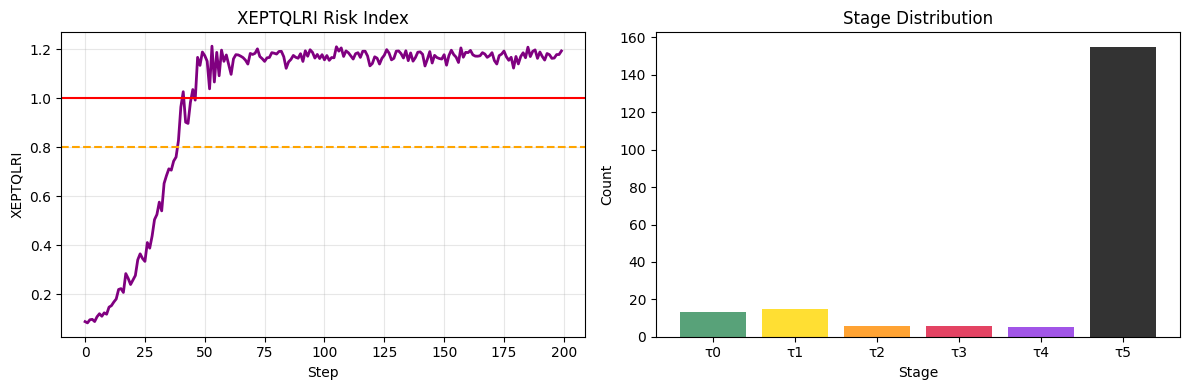


XEPTQLRI ANALYSIS COMPLETE


In [5]:
"""
XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM
Implementation of the Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI)
Based on Epameinondas Xenopoulos' work "Epistemology of Logic: Logic–Dialectic or Theory of Knowledge"
GitHub: https://github.com/kxenopoulou/epistemology-of-logic
"""

import numpy as np
import matplotlib.pyplot as plt
import warnings
import json
import pandas as pd
import matplotlib
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import io
import base64
from IPython.display import display, HTML, Image
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Settings for Unicode and display
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'Arial']
plt.rcParams['figure.constrained_layout.use'] = True

print("="*80)
print("XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM")
print("Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI)")
print("="*80)

class XenopoulosGeneticHistoricalSystem:
    """
    Implementation of Xenopoulos' Genetic-Historical Logic System
    with the Xenopoulos Pre‑Transitional Qualitative Leap Risk Index (XEPTQLRI).

    Core operators according to 'Epistemology of Logic':
    ¬ᴰ : Dialectical Negation (internal opposition that preserves)
    ∧ᴰ : Dialectical Conjunction (functional contradiction)
    ⤊  : Aufhebung/Sublation (qualitative leap operator)
    """

    def __init__(self, initial_state_A=0.3, historical_horizon=200,
                 aufhebung_threshold=0.85, volatility_factor=0.03,
                 system_name="Default System"):
        """
        Initialize the Xenopoulos Genetic-Historical Logic System.
        """
        self.A = np.clip(initial_state_A, 0, 1)
        self.horizon = historical_horizon
        self.aufhebung_threshold = aufhebung_threshold
        self.volatility = volatility_factor
        self.system_name = system_name

        # Initial dialectical negation ¬ᴰA
        self.anti_A = self._dialectical_negation(self.A)

        # Historical tracking
        self.history_A = []
        self.history_anti_A = []
        self.history_tension = []
        self.history_XEPTQLRI = []
        self.history_stages = []
        self.risk_events = []
        self.phase_history = []

        # Dialectical stages
        self.stages = {
            0: "τ₀: Coherence",
            1: "τ₁: First Anomaly",
            2: "τ₂: Anomaly Repetition",
            3: "τ₃: Meaning Incompatibility",
            4: "τ₄: System Saturation",
            5: "τ₅: Qualitative Leap (⤊)"
        }

        # Phase definitions
        self.phases = {
            0: "Stability Phase",
            1: "Anomaly Phase",
            2: "Contradiction Phase",
            3: "Crisis Phase",
            4: "Transition Phase"
        }

        print(f"✅ {system_name} Initialized")
        print(f"   • Initial State (A): {self.A:.3f}")
        print(f"   • Dialectical Negation (¬ᴰA): {self.anti_A:.3f}")
        print(f"   • Horizon: {self.horizon} steps")
        print(f"   • Aufhebung Threshold: {self.aufhebung_threshold}")

    def _dialectical_negation(self, state):
        """Implementation of Xenopoulos' ¬ᴰ operator."""
        preservation_factor = 0.8 + 0.2 * np.random.rand()
        return -state * preservation_factor

    def _dialectical_conjunction_intensity(self, state, anti_state):
        """Calculate intensity of (A ∧ᴰ ¬ᴰA)."""
        raw_intensity = np.abs(state * anti_state)
        complexity_factor = 1 + self.volatility * np.random.randn()
        intensity = np.clip(raw_intensity * complexity_factor, 0, 1)
        return intensity

    def _classify_dialectical_stage(self, tension_score):
        """Classify current system state into dialectical stages."""
        if tension_score < 0.15:
            return 0, self.stages[0]
        elif tension_score < 0.35:
            return 1, self.stages[1]
        elif tension_score < 0.55:
            return 2, self.stages[2]
        elif tension_score < 0.75:
            return 3, self.stages[3]
        elif tension_score < self.aufhebung_threshold:
            return 4, self.stages[4]
        else:
            return 5, self.stages[5]

    def _calculate_XEPTQLRI(self, tension, historical_trend):
        """Calculate XEPTQLRI score."""
        trend_factor = 1.0
        if historical_trend > 0.1:
            trend_factor = 1.5
        elif historical_trend > 0.3:
            trend_factor = 2.0

        XEPTQLRI = (tension * trend_factor) / self.aufhebung_threshold
        stochastic_factor = 1 + (self.volatility * 0.5 * np.random.randn())
        XEPTQLRI = XEPTQLRI * stochastic_factor

        return np.clip(XEPTQLRI, 0, 2.0)

    def simulate_realistic_historical_process(self):
        """Simulate historical process with distinct phases."""
        print(f"\n📊 SIMULATING {self.system_name.upper()}...")

        current_A = self.A
        current_anti_A = self.anti_A

        # Define phase boundaries
        phase_boundaries = [int(self.horizon*0.25), int(self.horizon*0.5),
                           int(self.horizon*0.75), int(self.horizon*0.9), self.horizon]

        for step in range(self.horizon):
            # Determine current phase
            current_phase = 0
            for p, boundary in enumerate(phase_boundaries):
                if step < boundary:
                    current_phase = p
                    break

            # Adjust parameters based on phase
            phase_params = {
                0: {"pressure": 0.02, "volatility": 0.01},
                1: {"pressure": 0.05, "volatility": 0.03},
                2: {"pressure": 0.10, "volatility": 0.05},
                3: {"pressure": 0.15, "volatility": 0.08},
                4: {"pressure": 0.20, "volatility": 0.12}
            }

            params = phase_params[current_phase]

            # Update dialectical negation ¬ᴰA
            historical_factor = 1 + 0.003 * step
            current_anti_A = self._dialectical_negation(current_A) * historical_factor

            # Calculate current tension (A ∧ᴰ ¬ᴰA)
            current_tension = self._dialectical_conjunction_intensity(current_A, current_anti_A)

            # Apply dialectical pressure
            dialectical_pressure = current_tension * params["pressure"]

            # Add historical trend and noise
            historical_trend = 0.01 * np.sin(step * 0.07)
            systemic_noise = params["volatility"] * np.random.randn()

            # Update A
            current_A = current_A + dialectical_pressure + historical_trend + systemic_noise
            current_A = np.clip(current_A, -1, 1)

            # Calculate XEPTQLRI
            if step > 10:
                recent_trend = np.polyfit(range(10), self.history_tension[-10:], 1)[0] if len(self.history_tension) >= 10 else 0
            else:
                recent_trend = 0

            XEPTQLRI = self._calculate_XEPTQLRI(current_tension, recent_trend)

            # Classify stage
            stage_idx, stage_name = self._classify_dialectical_stage(current_tension)

            # Store history
            self.history_A.append(current_A)
            self.history_anti_A.append(current_anti_A)
            self.history_tension.append(current_tension)
            self.history_XEPTQLRI.append(XEPTQLRI)
            self.history_stages.append(stage_idx)
            self.phase_history.append(current_phase)

            # Detect risk events
            if XEPTQLRI > 0.8:
                risk_level = "CRITICAL" if XEPTQLRI > 1.0 else "HIGH"
                self.risk_events.append({
                    'step': step,
                    'XEPTQLRI': XEPTQLRI,
                    'tension': current_tension,
                    'stage': stage_name,
                    'risk': risk_level,
                    'phase': self.phases[current_phase]
                })

        print(f"   ✅ Simulation completed: {self.horizon} steps")
        print(f"   ⚠️  Risk events detected: {len(self.risk_events)}")

        return self

    def analyze_XEPTQLRI(self, warning_threshold=0.8, critical_threshold=1.0):
        """Generate XEPTQLRI analysis report."""
        if not self.history_XEPTQLRI:
            self.simulate_realistic_historical_process()

        XEPTQLRI_array = np.array(self.history_XEPTQLRI)

        report = {
            'system_name': self.system_name,
            'metrics': {
                'mean_XEPTQLRI': float(np.mean(XEPTQLRI_array)),
                'max_XEPTQLRI': float(np.max(XEPTQLRI_array)),
                'final_XEPTQLRI': float(XEPTQLRI_array[-1]),
                'std_deviation': float(np.std(XEPTQLRI_array)),
                'mean_tension': float(np.mean(self.history_tension)),
                'total_risk_events': len(self.risk_events),
                'critical_events': len([e for e in self.risk_events if e['risk'] == 'CRITICAL'])
            },
            'current_stage': self.stages[self.history_stages[-1]],
            'stage_distribution': {},
            'phase_distribution': {}
        }

        # Stage distribution
        for idx, name in self.stages.items():
            count = np.sum(np.array(self.history_stages) == idx)
            report['stage_distribution'][name] = count

        # Phase distribution
        for idx, name in self.phases.items():
            count = np.sum(np.array(self.phase_history) == idx)
            report['phase_distribution'][name] = count

        # Recommendations
        if report['metrics']['max_XEPTQLRI'] > 1.0:
            report['recommendations'] = [
                "IMMEDIATE HUMAN INTERPRETATION REQUIRED",
                "System has exceeded Aufhebung threshold",
                "Qualitative transition (⤊) may be imminent",
                "Prepare contingency plans"
            ]
            report['priority'] = "🔴 CRITICAL"
        elif report['metrics']['max_XEPTQLRI'] > critical_threshold:
            report['recommendations'] = [
                "Increase monitoring frequency",
                "Prepare for potential qualitative transition",
                "Review system semantic foundations",
                "Document all anomalies"
            ]
            report['priority'] = "🟠 HIGH"
        elif report['metrics']['max_XEPTQLRI'] > warning_threshold:
            report['recommendations'] = [
                "Continue monitoring",
                "System shows elevated dialectical tension",
                "Document any semantic shifts",
                "Review historical patterns"
            ]
            report['priority'] = "🟡 MEDIUM"
        else:
            report['recommendations'] = [
                "System operating within stable parameters",
                "Maintain regular monitoring schedule",
                "Document baseline behavior",
                "Review periodically"
            ]
            report['priority'] = "🟢 LOW"

        return report

    def create_interactive_dashboard(self):
        """Create interactive dashboard with all visualizations."""
        if not self.history_XEPTQLRI:
            self.simulate_realistic_historical_process()

        # Create subplots
        fig = make_subplots(
            rows=4, cols=3,
            subplot_titles=('System State (A) & Dialectical Negation (¬ᴰA)',
                          'Dialectical Tension (A ∧ᴰ ¬ᴰA)',
                          'XEPTQLRI Risk Index',
                          'Dialectical Stage Distribution',
                          'System Phases',
                          'Risk Events Timeline',
                          'XEPTQLRI Heatmap',
                          'Tension vs XEPTQLRI',
                          'Stage Transitions',
                          'Risk Analysis Summary',
                          'System Metrics',
                          'Recommendations'),
            specs=[[{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}],
                   [{'type': 'bar'}, {'type': 'scatter'}, {'type': 'scatter'}],
                   [{'type': 'heatmap'}, {'type': 'scatter'}, {'type': 'scatter'}],
                   [{'type': 'table', 'colspan': 3}, None, None]],
            vertical_spacing=0.08,
            horizontal_spacing=0.08
        )

        # 1. System State and Dialectical Negation
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_A))),
                      y=self.history_A,
                      mode='lines',
                      name='A',
                      line=dict(color='blue', width=2)),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_anti_A))),
                      y=self.history_anti_A,
                      mode='lines',
                      name='¬ᴰA',
                      line=dict(color='red', width=2, dash='dash')),
            row=1, col=1
        )

        # 2. Dialectical Tension
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_tension))),
                      y=self.history_tension,
                      mode='lines',
                      name='Tension',
                      fill='tozeroy',
                      fillcolor='rgba(0,255,0,0.3)',
                      line=dict(color='green', width=2)),
            row=1, col=2
        )
        fig.add_hline(y=self.aufhebung_threshold,
                     line_dash="dash",
                     line_color="red",
                     annotation_text=f"Aufhebung Threshold: {self.aufhebung_threshold}",
                     row=1, col=2)

        # 3. XEPTQLRI Risk Index
        fig.add_trace(
            go.Scatter(x=list(range(len(self.history_XEPTQLRI))),
                      y=self.history_XEPTQLRI,
                      mode='lines',
                      name='XEPTQLRI',
                      line=dict(color='purple', width=2)),
            row=1, col=3
        )
        fig.add_hline(y=1.0, line_dash="solid", line_color="darkred",
                     annotation_text="Critical Threshold", row=1, col=3)
        fig.add_hline(y=0.8, line_dash="dash", line_color="orange",
                     annotation_text="Warning Threshold", row=1, col=3)

        # Highlight risk events
        if self.risk_events:
            risk_steps = [e['step'] for e in self.risk_events]
            risk_values = [e['XEPTQLRI'] for e in self.risk_events]
            fig.add_trace(
                go.Scatter(x=risk_steps, y=risk_values,
                          mode='markers',
                          name='Risk Events',
                          marker=dict(size=10, color='red', symbol='diamond')),
                row=1, col=3
            )

        # 4. Stage Distribution
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(6)]
        fig.add_trace(
            go.Bar(x=[f'τ{i}' for i in range(6)],
                  y=stage_counts,
                  marker_color=['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000'],
                  name='Stages'),
            row=2, col=1
        )

        # 5. System Phases
        fig.add_trace(
            go.Scatter(x=list(range(len(self.phase_history))),
                      y=self.phase_history,
                      mode='lines',
                      name='Phase',
                      line=dict(color='brown', width=2)),
            row=2, col=2
        )

        # 6. Risk Events Timeline
        if self.risk_events:
            risk_steps = [e['step'] for e in self.risk_events]
            risk_levels = [3 if e['risk'] == 'CRITICAL' else 2 if e['risk'] == 'HIGH' else 1 for e in self.risk_events]
            fig.add_trace(
                go.Scatter(x=risk_steps, y=risk_levels,
                          mode='markers+text',
                          name='Risk Level',
                          marker=dict(size=15, color='red'),
                          text=[e['risk'][0] for e in self.risk_events]),
                row=2, col=3
            )

        # 7. XEPTQLRI Heatmap
        window_size = 20
        heatmap_data = []
        for i in range(0, len(self.history_XEPTQLRI) - window_size, window_size//2):
            window = self.history_XEPTQLRI[i:i+window_size]
            heatmap_data.append(window)

        if heatmap_data:
            fig.add_trace(
                go.Heatmap(z=heatmap_data,
                          colorscale='RdYlGn_r',
                          showscale=True,
                          name='Risk Heatmap'),
                row=3, col=1
            )

        # 8. Tension vs XEPTQLRI
        fig.add_trace(
            go.Scatter(x=self.history_tension,
                      y=self.history_XEPTQLRI,
                      mode='markers',
                      marker=dict(size=5,
                                 color=self.history_stages,
                                 colorscale='Viridis',
                                 showscale=True),
                      name='Tension vs XEPTQLRI'),
            row=3, col=2
        )

        # 9. Stage Transitions
        stage_changes = np.diff(self.history_stages)
        change_points = np.where(stage_changes != 0)[0]
        if len(change_points) > 0:
            fig.add_trace(
                go.Scatter(x=change_points,
                          y=[self.history_stages[i] for i in change_points],
                          mode='markers',
                          marker=dict(size=10, color='blue'),
                          name='Stage Transitions'),
                row=3, col=3
            )

        # 10. Risk Analysis Summary (Table)
        report = self.analyze_XEPTQLRI()

        risk_table = go.Table(
            header=dict(values=['Metric', 'Value'],
                       fill_color='paleturquoise',
                       align='left'),
            cells=dict(values=[['System Name', 'Current Stage', 'Priority',
                               'Max XEPTQLRI', 'Mean XEPTQLRI', 'Risk Events',
                               'Critical Events', 'Aufhebung Threshold'],
                              [report['system_name'], report['current_stage'],
                               report['priority'], f"{report['metrics']['max_XEPTQLRI']:.3f}",
                               f"{report['metrics']['mean_XEPTQLRI']:.3f}",
                               report['metrics']['total_risk_events'],
                               report['metrics']['critical_events'],
                               self.aufhebung_threshold]],
                      fill_color='lavender',
                      align='left'),
            row=4, col=1
        )
        fig.add_trace(risk_table, row=4, col=1)

        # Update layout
        fig.update_layout(
            title=f"{self.system_name} - XEPTQLRI Interactive Dashboard",
            height=1400,
            showlegend=True,
            template='plotly_white'
        )

        # Update axes
        fig.update_xaxes(title_text="Historical Step", row=1, col=1)
        fig.update_yaxes(title_text="State Value", row=1, col=1)
        fig.update_xaxes(title_text="Step", row=1, col=2)
        fig.update_yaxes(title_text="Tension", row=1, col=2)
        fig.update_xaxes(title_text="Step", row=1, col=3)
        fig.update_yaxes(title_text="XEPTQLRI", row=1, col=3)
        fig.update_xaxes(title_text="Stage", row=2, col=1)
        fig.update_yaxes(title_text="Count", row=2, col=1)
        fig.update_xaxes(title_text="Step", row=2, col=2)
        fig.update_yaxes(title_text="Phase", row=2, col=2)
        fig.update_xaxes(title_text="Step", row=2, col=3)
        fig.update_yaxes(title_text="Risk Level", row=2, col=3)

        return fig

    def create_matplotlib_dashboard(self):
        """Create comprehensive matplotlib dashboard."""
        if not self.history_XEPTQLRI:
            self.simulate_realistic_historical_process()

        fig = plt.figure(figsize=(20, 16))
        fig.suptitle(f'{self.system_name} - XEPTQLRI Analysis Dashboard\n'
                    f'Xenopoulos Genetic-Historical Logic System',
                    fontsize=18, fontweight='bold', y=0.98)

        # Grid layout
        gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

        # 1. Main System Plot
        ax1 = fig.add_subplot(gs[0, :2])
        ax1.plot(self.history_A, 'b-', linewidth=2, alpha=0.8, label='A')
        ax1.plot(self.history_anti_A, 'r--', linewidth=2, alpha=0.6, label='¬ᴰA')
        ax1.set_title('System State and Dialectical Negation', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Historical Step')
        ax1.set_ylabel('State Value')
        ax1.legend(loc='best')
        ax1.grid(True, alpha=0.2)

        # 2. Tension and XEPTQLRI
        ax2 = fig.add_subplot(gs[0, 2:])
        ax2_tension = ax2.twinx()

        line1 = ax2.plot(self.history_tension, 'g-', linewidth=2, alpha=0.7, label='Tension')[0]
        ax2.axhline(y=self.aufhebung_threshold, color='r', linestyle='--',
                   alpha=0.7, label=f'Threshold: {self.aufhebung_threshold}')
        ax2.set_ylabel('Tension', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        line2 = ax2_tension.plot(self.history_XEPTQLRI, 'purple', linewidth=2,
                                alpha=0.7, label='XEPTQLRI')[0]
        ax2_tension.axhline(y=1.0, color='darkred', linestyle='-',
                           alpha=0.6, label='Critical')
        ax2_tension.axhline(y=0.8, color='orange', linestyle='--',
                           alpha=0.6, label='Warning')
        ax2_tension.set_ylabel('XEPTQLRI', color='purple')
        ax2_tension.tick_params(axis='y', labelcolor='purple')

        ax2.set_title('Dialectical Tension and XEPTQLRI', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Step')
        ax2.legend([line1, line2], ['Tension', 'XEPTQLRI'], loc='upper left')

        # 3. Stage Distribution
        ax3 = fig.add_subplot(gs[1, 0])
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        bars = ax3.bar(range(6), stage_counts, color=colors, alpha=0.8)
        ax3.set_title('Dialectical Stage Distribution', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Stage')
        ax3.set_ylabel('Count')
        ax3.set_xticks(range(6))
        ax3.set_xticklabels([f'τ{i}' for i in range(6)], rotation=45)

        for bar, count in zip(bars, stage_counts):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    str(count), ha='center', va='bottom', fontsize=9)

        # 4. Phase Timeline
        ax4 = fig.add_subplot(gs[1, 1])
        phase_colors = ['lightgreen', 'lightyellow', 'lightorange', 'lightcoral', 'lightpink']
        for phase in range(5):
            indices = np.where(np.array(self.phase_history) == phase)[0]
            if len(indices) > 0:
                ax4.scatter(indices, [phase]*len(indices),
                           color=phase_colors[phase], alpha=0.6, s=20,
                           label=self.phases[phase])
        ax4.set_title('System Phases Timeline', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Step')
        ax4.set_ylabel('Phase')
        ax4.set_yticks(range(5))
        ax4.set_yticklabels([f'P{i}' for i in range(5)])
        ax4.legend(loc='best', fontsize=8)

        # 5. Risk Events
        ax5 = fig.add_subplot(gs[1, 2])
        if self.risk_events:
            risk_steps = [e['step'] for e in self.risk_events]
            risk_levels = []
            for e in self.risk_events:
                if e['risk'] == 'CRITICAL':
                    risk_levels.append(3)
                elif e['risk'] == 'HIGH':
                    risk_levels.append(2)
                else:
                    risk_levels.append(1)

            scatter = ax5.scatter(risk_steps, risk_levels,
                                 c=risk_levels, cmap='RdYlGn_r',
                                 s=50, alpha=0.7)
            ax5.set_title('Risk Events', fontsize=12, fontweight='bold')
            ax5.set_xlabel('Step')
            ax5.set_ylabel('Risk Level')
            ax5.set_yticks([1, 2, 3])
            ax5.set_yticklabels(['Low', 'High', 'Critical'])
            plt.colorbar(scatter, ax=ax5, label='Risk Intensity')
        else:
            ax5.text(0.5, 0.5, 'No Risk Events',
                    ha='center', va='center', fontsize=14,
                    transform=ax5.transAxes)
            ax5.set_title('Risk Events', fontsize=12, fontweight='bold')

        # 6. Scatter Plot: Tension vs XEPTQLRI
        ax6 = fig.add_subplot(gs[1, 3])
        scatter = ax6.scatter(self.history_tension, self.history_XEPTQLRI,
                             c=self.history_stages, cmap='viridis',
                             alpha=0.6, s=20)
        ax6.set_title('Tension vs XEPTQLRI', fontsize=12, fontweight='bold')
        ax6.set_xlabel('Tension')
        ax6.set_ylabel('XEPTQLRI')
        ax6.axhline(y=1.0, color='darkred', linestyle='-', alpha=0.3)
        ax6.axhline(y=0.8, color='orange', linestyle='--', alpha=0.3)
        plt.colorbar(scatter, ax=ax6, label='Stage')

        # 7. XEPTQLRI Histogram
        ax7 = fig.add_subplot(gs[2, 0])
        ax7.hist(self.history_XEPTQLRI, bins=30, color='purple', alpha=0.7, edgecolor='black')
        ax7.axvline(x=1.0, color='red', linestyle='-', linewidth=2, label='Critical')
        ax7.axvline(x=0.8, color='orange', linestyle='--', linewidth=2, label='Warning')
        ax7.set_title('XEPTQLRI Distribution', fontsize=12, fontweight='bold')
        ax7.set_xlabel('XEPTQLRI Value')
        ax7.set_ylabel('Frequency')
        ax7.legend()

        # 8. Stage Transitions
        ax8 = fig.add_subplot(gs[2, 1])
        stage_changes = np.diff(self.history_stages)
        change_points = np.where(stage_changes != 0)[0]
        if len(change_points) > 0:
            ax8.plot(change_points, [self.history_stages[i] for i in change_points],
                    'bo-', alpha=0.7, markersize=8)
            ax8.set_title('Stage Transitions', fontsize=12, fontweight='bold')
            ax8.set_xlabel('Step')
            ax8.set_ylabel('Stage')
            ax8.set_yticks(range(6))
            ax8.set_yticklabels([f'τ{i}' for i in range(6)])
        else:
            ax8.text(0.5, 0.5, 'No Stage Transitions',
                    ha='center', va='center', fontsize=14,
                    transform=ax8.transAxes)
            ax8.set_title('Stage Transitions', fontsize=12, fontweight='bold')

        # 9. Moving Average
        ax9 = fig.add_subplot(gs[2, 2])
        window = 20
        if len(self.history_XEPTQLRI) > window:
            moving_avg = np.convolve(self.history_XEPTQLRI,
                                    np.ones(window)/window, mode='valid')
            ax9.plot(range(window-1, len(self.history_XEPTQLRI)), moving_avg,
                    'b-', linewidth=2, alpha=0.8, label=f'{window}-step MA')
            ax9.plot(self.history_XEPTQLRI, 'gray', alpha=0.3, label='Original')
            ax9.set_title(f'XEPTQLRI Moving Average (window={window})',
                         fontsize=12, fontweight='bold')
            ax9.set_xlabel('Step')
            ax9.set_ylabel('XEPTQLRI')
            ax9.legend()
        else:
            ax9.text(0.5, 0.5, 'Insufficient data for moving average',
                    ha='center', va='center', fontsize=12,
                    transform=ax9.transAxes)
            ax9.set_title('Moving Average', fontsize=12, fontweight='bold')

        # 10. Phase Distribution
        ax10 = fig.add_subplot(gs[2, 3])
        phase_counts = [np.sum(np.array(self.phase_history) == i) for i in range(5)]
        wedges, texts, autotexts = ax10.pie(phase_counts,
                                           labels=[f'P{i}' for i in range(5)],
                                           autopct='%1.1f%%',
                                           colors=phase_colors)
        ax10.set_title('Phase Distribution', fontsize=12, fontweight='bold')

        # 11. Detailed Report
        ax11 = fig.add_subplot(gs[3, :])
        ax11.axis('off')

        report = self.analyze_XEPTQLRI()

        report_text = (
            f"{'='*60}\n"
            f"{self.system_name.upper()} - XEPTQLRI ANALYSIS REPORT\n"
            f"{'='*60}\n\n"
            f"SYSTEM METRICS:\n"
            f"• Max XEPTQLRI:           {report['metrics']['max_XEPTQLRI']:.3f}\n"
            f"• Mean XEPTQLRI:          {report['metrics']['mean_XEPTQLRI']:.3f}\n"
            f"• Final XEPTQLRI:         {report['metrics']['final_XEPTQLRI']:.3f}\n"
            f"• Mean Tension:           {report['metrics']['mean_tension']:.3f}\n"
            f"• Standard Deviation:     {report['metrics']['std_deviation']:.3f}\n"
            f"• Total Risk Events:      {report['metrics']['total_risk_events']}\n"
            f"• Critical Events:        {report['metrics']['critical_events']}\n\n"
            f"SYSTEM STATE:\n"
            f"• Current Stage:          {report['current_stage']}\n"
            f"• Priority Level:         {report['priority']}\n"
            f"• Aufhebung Threshold:    {self.aufhebung_threshold}\n\n"
            f"RECOMMENDATIONS:\n"
        )

        for i, rec in enumerate(report['recommendations'], 1):
            report_text += f"{i}. {rec}\n"

        # Color based on priority
        if "CRITICAL" in report['priority']:
            box_color = '#FFCCCC'
        elif "HIGH" in report['priority']:
            box_color = '#FFE5CC'
        elif "MEDIUM" in report['priority']:
            box_color = '#FFFFCC'
        else:
            box_color = '#CCFFCC'

        ax11.text(0.02, 0.98, report_text, fontsize=10, family='monospace',
                 verticalalignment='top', transform=ax11.transAxes,
                 bbox=dict(boxstyle='round', facecolor=box_color,
                          alpha=0.9, edgecolor='black'))

        plt.tight_layout()
        return fig

    def export_to_ipynb(self, filename="xenopoulos_analysis"):
        """Export analysis to Jupyter Notebook format."""
        import nbformat as nbf

        # Create a new notebook
        nb = nbf.v4.new_notebook()

        # Add title cell
        title_cell = nbf.v4.new_markdown_cell(f"""# {self.system_name} - XEPTQLRI Analysis

## Xenopoulos Genetic-Historical Logic System
### Pre‑Transitional Qualitative Leap Risk Index Analysis

**Parameters:**
- Initial State A: {self.A}
- Historical Horizon: {self.horizon} steps
- Aufhebung Threshold: {self.aufhebung_threshold}
- Volatility Factor: {self.volatility}

**Simulation Results:**
- Total Steps: {len(self.history_A)}
- Risk Events: {len(self.risk_events)}
- Current Stage: {self.stages[self.history_stages[-1]] if self.history_stages else 'Not simulated'}
""")

        # Add simulation code cell
        sim_code = f"""# Simulation Code
system = XenopoulosGeneticHistoricalSystem(
    initial_state_A={self.A},
    historical_horizon={self.horizon},
    aufhebung_threshold={self.aufhebung_threshold},
    volatility_factor={self.volatility},
    system_name="{self.system_name}"
)

results = system.simulate_realistic_historical_process()
report = system.analyze_XEPTQLRI()

print("Simulation Complete!")
print(f"Max XEPTQLRI: {{report['metrics']['max_XEPTQLRI']:.3f}}")
print(f"Risk Events: {{len(system.risk_events)}}")
print(f"Priority: {{report['priority']}}")"""

        code_cell1 = nbf.v4.new_code_cell(sim_code)

        # Add visualization code cell
        viz_code = """# Create Interactive Dashboard
interactive_fig = system.create_interactive_dashboard()
interactive_fig.show()

# Create Matplotlib Dashboard
matplotlib_fig = system.create_matplotlib_dashboard()
plt.show()"""

        code_cell2 = nbf.v4.new_code_cell(viz_code)

        # Add data export code cell
        export_code = """# Export Data
import pandas as pd

# Create DataFrame
df = pd.DataFrame({
    'step': range(len(system.history_A)),
    'A': system.history_A,
    'anti_A': system.history_anti_A,
    'tension': system.history_tension,
    'XEPTQLRI': system.history_XEPTQLRI,
    'stage': system.history_stages,
    'phase': system.phase_history
})

# Export to CSV
df.to_csv('xenopoulos_data.csv', index=False)
print("Data exported to xenopoulos_data.csv")

# Export report
report = system.analyze_XEPTQLRI()
with open('xenopoulos_report.json', 'w') as f:
    json.dump(report, f, indent=2)
print("Report exported to xenopoulos_report.json")"""

        code_cell3 = nbf.v4.new_code_cell(export_code)

        # Add cells to notebook
        nb.cells = [title_cell, code_cell1, code_cell2, code_cell3]

        # Write notebook to file
        with open(f"{filename}.ipynb", 'w') as f:
            nbf.write(nb, f)

        print(f"✅ Notebook exported to {filename}.ipynb")

        # Also export data files
        self.export_data(f"{filename}_data")

        return f"{filename}.ipynb"

    def export_data(self, filename="xenopoulos_data"):
        """Export all data to files."""
        # Create DataFrame
        df = pd.DataFrame({
            'step': range(len(self.history_A)),
            'A': self.history_A,
            'anti_A': self.history_anti_A,
            'tension': self.history_tension,
            'XEPTQLRI': self.history_XEPTQLRI,
            'stage': self.history_stages,
            'stage_name': [self.stages[s] for s in self.history_stages],
            'phase': self.phase_history,
            'phase_name': [self.phases[p] for p in self.phase_history]
        })

        # Export to CSV
        csv_file = f"{filename}.csv"
        df.to_csv(csv_file, index=False, encoding='utf-8')

        # Export to JSON
        json_file = f"{filename}.json"
        export_data = {
            'system_info': {
                'name': self.system_name,
                'parameters': {
                    'initial_A': float(self.A),
                    'horizon': self.horizon,
                    'aufhebung_threshold': self.aufhebung_threshold,
                    'volatility': self.volatility
                }
            },
            'analysis': self.analyze_XEPTQLRI(),
            'risk_events': self.risk_events,
            'summary_stats': {
                'mean_XEPTQLRI': float(np.mean(self.history_XEPTQLRI)),
                'max_XEPTQLRI': float(np.max(self.history_XEPTQLRI)),
                'min_XEPTQLRI': float(np.min(self.history_XEPTQLRI)),
                'std_XEPTQLRI': float(np.std(self.history_XEPTQLRI)),
                'stage_counts': {self.stages[i]: int(np.sum(np.array(self.history_stages) == i))
                                for i in range(6)},
                'phase_counts': {self.phases[i]: int(np.sum(np.array(self.phase_history) == i))
                                for i in range(5)}
            }
        }

        with open(json_file, 'w', encoding='utf-8') as f:
            json.dump(export_data, f, indent=2, ensure_ascii=False)

        # Save visualizations
        fig1 = self.create_matplotlib_dashboard()
        fig1.savefig(f"{filename}_dashboard.png", dpi=150, bbox_inches='tight')

        # Create individual plots
        fig2, axes = plt.subplots(2, 2, figsize=(12, 10))

        # Plot 1: Time series
        axes[0, 0].plot(self.history_A, 'b-', label='A')
        axes[0, 0].plot(self.history_anti_A, 'r--', label='¬ᴰA')
        axes[0, 0].set_title('System State Evolution')
        axes[0, 0].set_xlabel('Step')
        axes[0, 0].set_ylabel('Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Plot 2: XEPTQLRI
        axes[0, 1].plot(self.history_XEPTQLRI, 'purple')
        axes[0, 1].axhline(y=1.0, color='red', linestyle='-', label='Critical')
        axes[0, 1].axhline(y=0.8, color='orange', linestyle='--', label='Warning')
        axes[0, 1].set_title('XEPTQLRI Risk Index')
        axes[0, 1].set_xlabel('Step')
        axes[0, 1].set_ylabel('XEPTQLRI')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Plot 3: Stage distribution
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        axes[1, 0].bar(range(6), stage_counts, color=colors)
        axes[1, 0].set_title('Dialectical Stage Distribution')
        axes[1, 0].set_xlabel('Stage')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_xticks(range(6))
        axes[1, 0].set_xticklabels([f'τ{i}' for i in range(6)])

        # Plot 4: Scatter plot
        scatter = axes[1, 1].scatter(self.history_tension, self.history_XEPTQLRI,
                                    c=self.history_stages, cmap='viridis', alpha=0.6)
        axes[1, 1].set_title('Tension vs XEPTQLRI')
        axes[1, 1].set_xlabel('Tension')
        axes[1, 1].set_ylabel('XEPTQLRI')
        plt.colorbar(scatter, ax=axes[1, 1], label='Stage')
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        fig2.savefig(f"{filename}_summary.png", dpi=150, bbox_inches='tight')
        plt.close('all')

        print(f"✅ Data exported:")
        print(f"  • {csv_file} (CSV data)")
        print(f"  • {json_file} (JSON report)")
        print(f"  • {filename}_dashboard.png (Dashboard)")
        print(f"  • {filename}_summary.png (Summary plots)")

        return {
            'csv': csv_file,
            'json': json_file,
            'dashboard_png': f"{filename}_dashboard.png",
            'summary_png': f"{filename}_summary.png"
        }


# ============================================================================
# INTERACTIVE DEMONSTRATION
# ============================================================================

def interactive_demonstration():
    """Create interactive demonstration with widgets."""
    print("="*80)
    print("INTERACTIVE XEPTQLRI DEMONSTRATION")
    print("="*80)

    def create_system(initial_A, horizon, threshold, volatility, system_type):
        """Create system based on parameters."""
        if system_type == "Stable":
            return XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name="Stable System"
            )
        elif system_type == "Critical":
            return XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name="Critical System"
            )
        else:  # Supercritical
            return XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name="Supercritical System"
            )

    def update_plots(initial_A, horizon, threshold, volatility, system_type):
        """Update plots based on parameters."""
        system = create_system(initial_A, horizon, threshold, volatility, system_type)
        system.simulate_realistic_historical_process()

        # Create figure
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Plot 1: System State
        axes[0, 0].plot(system.history_A, 'b-', label='A')
        axes[0, 0].plot(system.history_anti_A, 'r--', label='¬ᴰA')
        axes[0, 0].set_title(f'{system.system_name}: State Evolution')
        axes[0, 0].set_xlabel('Step')
        axes[0, 0].set_ylabel('Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Plot 2: XEPTQLRI
        axes[0, 1].plot(system.history_XEPTQLRI, 'purple', linewidth=2)
        axes[0, 1].axhline(y=1.0, color='red', linestyle='-', label='Critical')
        axes[0, 1].axhline(y=0.8, color='orange', linestyle='--', label='Warning')
        axes[0, 1].axhline(y=threshold, color='green', linestyle=':',
                          label=f'Threshold: {threshold}')
        axes[0, 1].set_title('XEPTQLRI Risk Index')
        axes[0, 1].set_xlabel('Step')
        axes[0, 1].set_ylabel('XEPTQLRI')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Plot 3: Tension
        axes[1, 0].plot(system.history_tension, 'g-', linewidth=2)
        axes[1, 0].axhline(y=threshold, color='red', linestyle='--',
                          label=f'Threshold: {threshold}')
        axes[1, 0].set_title('Dialectical Tension (A ∧ᴰ ¬ᴰA)')
        axes[1, 0].set_xlabel('Step')
        axes[1, 0].set_ylabel('Tension')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # Plot 4: Stage distribution
        stage_counts = [np.sum(np.array(system.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        bars = axes[1, 1].bar(range(6), stage_counts, color=colors, alpha=0.8)
        axes[1, 1].set_title('Dialectical Stage Distribution')
        axes[1, 1].set_xlabel('Stage')
        axes[1, 1].set_ylabel('Count')
        axes[1, 1].set_xticks(range(6))
        axes[1, 1].set_xticklabels([f'τ{i}' for i in range(6)])

        for bar, count in zip(bars, stage_counts):
            axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                           str(count), ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

        # Display report
        report = system.analyze_XEPTQLRI()
        print(f"\n📊 {system.system_name.upper()} REPORT:")
        print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
        print(f"   Risk Events: {report['metrics']['total_risk_events']}")
        print(f"   Current Stage: {report['current_stage']}")
        print(f"   Priority: {report['priority']}")

        return system

    # Create interactive widgets
    initial_A_slider = widgets.FloatSlider(
        value=0.4, min=0.0, max=1.0, step=0.05,
        description='Initial A:', style={'description_width': 'initial'}
    )

    horizon_slider = widgets.IntSlider(
        value=200, min=50, max=500, step=50,
        description='Horizon:', style={'description_width': 'initial'}
    )

    threshold_slider = widgets.FloatSlider(
        value=0.7, min=0.5, max=0.95, step=0.05,
        description='Threshold:', style={'description_width': 'initial'}
    )

    volatility_slider = widgets.FloatSlider(
        value=0.03, min=0.01, max=0.1, step=0.01,
        description='Volatility:', style={'description_width': 'initial'}
    )

    system_dropdown = widgets.Dropdown(
        options=['Stable', 'Critical', 'Supercritical'],
        value='Stable',
        description='System Type:',
        style={'description_width': 'initial'}
    )

    # Create interactive plot
    interact(update_plots,
             initial_A=initial_A_slider,
             horizon=horizon_slider,
             threshold=threshold_slider,
             volatility=volatility_slider,
             system_type=system_dropdown)


def comprehensive_demo():
    """Run comprehensive demonstration."""
    print("\n" + "="*80)
    print("COMPREHENSIVE XEPTQLRI DEMONSTRATION")
    print("="*80)

    # Create example systems
    systems = {
        'stable': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.2,
            historical_horizon=150,
            aufhebung_threshold=0.9,
            volatility_factor=0.01,
            system_name="Stable System"
        ),
        'critical': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.5,
            historical_horizon=200,
            aufhebung_threshold=0.75,
            volatility_factor=0.04,
            system_name="Critical System"
        ),
        'supercritical': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.7,
            historical_horizon=250,
            aufhebung_threshold=0.65,
            volatility_factor=0.07,
            system_name="Supercritical System"
        )
    }

    results = {}
    for name, system in systems.items():
        print(f"\n📊 Analyzing {system.system_name}...")
        system.simulate_realistic_historical_process()
        report = system.analyze_XEPTQLRI()
        results[name] = (system, report)

        print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
        print(f"   Risk Events: {report['metrics']['total_risk_events']}")
        print(f"   Priority: {report['priority']}")

        # Export to IPYNB
        system.export_to_ipynb(f"xenopoulos_{name}_system")

    # Create comparison dashboard
    print("\n🎨 Creating comparison dashboard...")

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))

    for idx, (name, (system, report)) in enumerate(results.items()):
        row = idx

        # XEPTQLRI comparison
        axes[row, 0].plot(system.history_XEPTQLRI,
                         color=['blue', 'orange', 'red'][idx],
                         linewidth=2)
        axes[row, 0].axhline(y=1.0, color='darkred', linestyle='-', alpha=0.5)
        axes[row, 0].axhline(y=0.8, color='orange', linestyle='--', alpha=0.5)
        axes[row, 0].set_title(f'{system.system_name}\nMax XEPTQLRI: {report["metrics"]["max_XEPTQLRI"]:.3f}')
        axes[row, 0].set_xlabel('Step')
        axes[row, 0].set_ylabel('XEPTQLRI')
        axes[row, 0].grid(True, alpha=0.3)

        # Tension comparison
        axes[row, 1].plot(system.history_tension,
                         color=['green', 'orange', 'red'][idx],
                         linewidth=2)
        axes[row, 1].axhline(y=system.aufhebung_threshold,
                           color='red', linestyle='--', alpha=0.7)
        axes[row, 1].set_title(f'Dialectical Tension\nMean: {report["metrics"]["mean_tension"]:.3f}')
        axes[row, 1].set_xlabel('Step')
        axes[row, 1].set_ylabel('Tension')
        axes[row, 1].grid(True, alpha=0.3)

        # Stage distribution
        stage_counts = [np.sum(np.array(system.history_stages) == i) for i in range(6)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
        axes[row, 2].bar(range(6), stage_counts, color=colors, alpha=0.8)
        axes[row, 2].set_title(f'Stage Distribution\nCurrent: {report["current_stage"]}')
        axes[row, 2].set_xlabel('Stage')
        axes[row, 2].set_ylabel('Count')
        axes[row, 2].set_xticks(range(6))
        axes[row, 2].set_xticklabels([f'τ{i}' for i in range(6)])

    plt.suptitle('XEPTQLRI System Comparison Dashboard', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('xenopoulos_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("\n✅ Demonstration completed!")
    print("📁 Exported files:")
    print("  • xenopoulos_stable_system.ipynb")
    print("  • xenopoulos_critical_system.ipynb")
    print("  • xenopoulos_supercritical_system.ipynb")
    print("  • xenopoulos_comparison.png")

    return results


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    """
    Main execution with interactive options.
    """

    print("\n" + "="*80)
    print("XENOPOULOS XEPTQLRI SYSTEM - MAIN MENU")
    print("="*80)

    print("\nSelect an option:")
    print("1. Interactive Demonstration (with widgets)")
    print("2. Comprehensive Demo (all systems)")
    print("3. Create Custom System")
    print("4. Quick Analysis")
    print("5. Exit")

    try:
        choice = input("\nEnter choice (1-5): ").strip()

        if choice == "1":
            print("\nLaunching interactive demonstration...")
            interactive_demonstration()

        elif choice == "2":
            print("\nRunning comprehensive demonstration...")
            results = comprehensive_demo()

        elif choice == "3":
            print("\nCREATE CUSTOM SYSTEM")
            print("-"*40)

            initial_A = float(input("Initial state A (0-1): ") or "0.5")
            horizon = int(input("Simulation horizon: ") or "200")
            threshold = float(input("Aufhebung threshold (0.5-0.95): ") or "0.7")
            volatility = float(input("Volatility factor (0.01-0.1): ") or "0.03")
            name = input("System name: ") or "Custom System"

            system = XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name=name
            )

            system.simulate_realistic_historical_process()

            print("\n📊 CUSTOM SYSTEM ANALYSIS")
            print("-"*40)

            # Show dashboard
            fig = system.create_matplotlib_dashboard()
            plt.show()

            # Show report
            report = system.analyze_XEPTQLRI()
            print(f"\nSystem: {report['system_name']}")
            print(f"Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
            print(f"Risk Events: {report['metrics']['total_risk_events']}")
            print(f"Current Stage: {report['current_stage']}")
            print(f"Priority: {report['priority']}")

            export_choice = input("\nExport to IPYNB? (y/n): ").lower().strip()
            if export_choice == 'y':
                system.export_to_ipynb(f"xenopoulos_{name.lower().replace(' ', '_')}")
                print("✅ Notebook exported!")

        elif choice == "4":
            print("\nQUICK ANALYSIS")
            print("-"*40)

            system = XenopoulosGeneticHistoricalSystem(
                system_name="Quick Analysis System"
            )

            system.simulate_realistic_historical_process()
            report = system.analyze_XEPTQLRI()

            print(f"\n📋 QUICK RESULTS:")
            print(f"   Steps: {len(system.history_A)}")
            print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
            print(f"   Risk Events: {report['metrics']['total_risk_events']}")
            print(f"   Current Stage: {report['current_stage']}")
            print(f"   Priority: {report['priority']}")

            # Quick visualization
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            axes[0].plot(system.history_XEPTQLRI, 'purple', linewidth=2)
            axes[0].axhline(y=1.0, color='red', linestyle='-')
            axes[0].axhline(y=0.8, color='orange', linestyle='--')
            axes[0].set_title('XEPTQLRI Risk Index')
            axes[0].set_xlabel('Step')
            axes[0].set_ylabel('XEPTQLRI')
            axes[0].grid(True, alpha=0.3)

            stage_counts = [np.sum(np.array(system.history_stages) == i) for i in range(6)]
            colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2', '#000000']
            axes[1].bar(range(6), stage_counts, color=colors, alpha=0.8)
            axes[1].set_title('Stage Distribution')
            axes[1].set_xlabel('Stage')
            axes[1].set_ylabel('Count')
            axes[1].set_xticks(range(6))
            axes[1].set_xticklabels([f'τ{i}' for i in range(6)])

            plt.tight_layout()
            plt.show()

        elif choice == "5":
            print("Exiting...")

        else:
            print("Invalid choice. Please enter 1-5.")

    except KeyboardInterrupt:
        print("\n\n⏹️  Program interrupted.")
    except Exception as e:
        print(f"\n❌ Error: {e}")
        import traceback
        traceback.print_exc()

    print("\n" + "="*80)
    print("XEPTQLRI ANALYSIS COMPLETE")
    print("="*80)

In [3]:
"""
XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM (XEPTQLRI)
Complete Implementation v2.0 with Paradoxical Transcendence Detection

Founder and Theorist: EPAMEINONDAS XENOPOULOS
Source: "Epistemology of Logic: Logic–Dialectic or Theory of Knowledge" (2024)
GitHub: https://github.com/kxenopoulou/epistemology-of-logic
"""

import numpy as np
import matplotlib.pyplot as plt
import warnings
import json
import pandas as pd
import matplotlib
from matplotlib.patches import Rectangle, FancyBboxPatch
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
import sys
from datetime import datetime
import hashlib
import traceback

warnings.filterwarnings('ignore')

# Settings for Unicode and display
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'Arial']
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

print("="*80)
print("XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM v2.0")
print("Enhanced with Paradoxical Transcendence Detection")
print("="*80)

class XenopoulosGeneticHistoricalSystem:
    """
    Complete Implementation of Xenopoulos' Genetic-Historical Logic System
    with the XEPTQLRI (Xenopoulos Pre‑Transitional Qualitative Leap Risk Index)

    Founder: Epameinondas Xenopoulos
    Based on: "Epistemology of Logic: Logic–Dialectic or Theory of Knowledge" (2024)
    """

    def __init__(self, initial_state_A=0.3, historical_horizon=200,
                 aufhebung_threshold=0.85, volatility_factor=0.03,
                 system_name="Default System", seed=None):
        """
        Initialize the Xenopoulos Genetic-Historical Logic System.

        Parameters:
        -----------
        initial_state_A : float
            Initial value of system state A (0-1 normalized)
        historical_horizon : int
            Number of time steps for simulation/analysis
        aufhebung_threshold : float
            Critical tension threshold for qualitative transition (⤊ operator)
        volatility_factor : float
            Stochastic volatility factor of the dialectical process
        system_name : str
            Name identifier for the system
        seed : int, optional
            Random seed for reproducibility
        """
        if seed is not None:
            np.random.seed(seed)

        self.A = np.clip(initial_state_A, 0, 1)
        self.horizon = historical_horizon
        self.aufhebung_threshold = aufhebung_threshold
        self.volatility = volatility_factor
        self.system_name = system_name
        self.creation_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        self.system_id = hashlib.md5(f"{system_name}{initial_state_A}{historical_horizon}".encode()).hexdigest()[:8]

        # Initial dialectical negation ¬ᴰA
        self.anti_A = self._enhanced_dialectical_negation(self.A)

        # Historical tracking
        self.history_A = []
        self.history_anti_A = []
        self.history_tension = []
        self.history_XEPTQLRI = []
        self.history_true_XEPTQLRI = []
        self.history_stages = []
        self.history_true_stages = []
        self.history_paradox_scores = []
        self.risk_events = []
        self.paradox_events = []
        self.phase_history = []

        # Enhanced dialectical stages with paradox detection
        self.stages = {
            0: "τ₀: Coherence",
            1: "τ₁: First Anomaly",
            2: "τ₂: Anomaly Repetition",
            3: "τ₃: Meaning Incompatibility",
            4: "τ₄: System Saturation",
            5: "τ₅: Qualitative Leap (⤊)",
            6: "τ₆: Paradoxical Transcendence (⟡)",
            7: "τ₇: False Stability",
            8: "τ₈: Permanent Dialectics",
            9: "τ₉: Meta-Transcendence"
        }

        # Enhanced phase definitions
        self.phases = {
            0: "Stability Phase",
            1: "Anomaly Phase",
            2: "Contradiction Phase",
            3: "Crisis Phase",
            4: "Transition Phase",
            5: "Paradox Phase",
            6: "Meta-Stability Phase"
        }

        # System metadata
        self.metadata = {
            'system_id': self.system_id,
            'creation_time': self.creation_time,
            'initial_state': float(self.A),
            'horizon': self.horizon,
            'aufhebung_threshold': self.aufhebung_threshold,
            'volatility': self.volatility,
            'stage_count': len(self.stages)
        }

        print(f"⚡ ENHANCED XENOPOULOS SYSTEM INITIALIZED")
        print(f"   System ID: {self.system_id}")
        print(f"   Name: {self.system_name}")
        print(f"   Initial State (A): {self.A:.3f}")
        print(f"   Dialectical Negation (¬ᴰA): {self.anti_A:.3f}")
        print(f"   Historical Horizon: {self.horizon} steps")
        print(f"   Aufhebung Threshold: {self.aufhebung_threshold}")
        print(f"   Enhanced Stages: {len(self.stages)} stages")

    # ============================================================================
    # CORE DIALECTICAL OPERATORS
    # ============================================================================

    def _enhanced_dialectical_negation(self, state):
        """
        Enhanced ¬ᴰ operator with historical memory and paradox awareness.

        According to Xenopoulos: "Not 'not-A' but 'the internal opposition that preserves A'"
        """
        preservation_factor = 0.8 + 0.2 * np.random.rand()

        historical_effect = 0.0
        if len(self.history_A) > 0:
            recent_mean = np.mean(self.history_A[-10:] if len(self.history_A) >= 10 else self.history_A)
            historical_effect = 0.1 * np.tanh(recent_mean)

        paradox_feedback = 0.0
        if len(self.history_paradox_scores) > 0 and np.mean(self.history_paradox_scores[-5:]) > 0.7:
            paradox_feedback = 0.05 * np.random.randn()

        enhanced_negation = -state * preservation_factor * (1 + historical_effect + paradox_feedback)
        stochastic_component = self.volatility * 0.1 * np.random.randn()

        return enhanced_negation + stochastic_component

    def _dialectical_conjunction_intensity(self, state, anti_state):
        """
        Calculate intensity of (A ∧ᴰ ¬ᴰA) with paradox awareness.

        According to Xenopoulos: "Creates logically valid contradictions"
        """
        raw_intensity = np.abs(state * anti_state)

        if abs(state) > 0.8 and abs(anti_state) > 0.8:
            complexity_factor = 1.5 + self.volatility * np.random.randn()
        else:
            complexity_factor = 1 + self.volatility * np.random.randn()

        intensity = np.clip(raw_intensity * complexity_factor, 0, 1)
        return intensity

    def _calculate_paradox_score(self, state, anti_state, tension):
        """
        Calculate paradox score for enhanced detection.
        """
        extremity_score = min(abs(state), abs(anti_state))
        symmetry_score = 1 - abs(abs(state) - abs(anti_state))

        if extremity_score > 0.7 and tension < 0.3:
            tension_paradox = 0.5
        else:
            tension_paradox = 0

        persistence_score = 0
        if len(self.history_A) > 10:
            recent_states = self.history_A[-10:]
            recent_anti = self.history_anti_A[-10:]
            if np.mean([abs(s) for s in recent_states]) > 0.7 and np.mean([abs(a) for a in recent_anti]) > 0.7:
                persistence_score = 0.3

        paradox_score = (extremity_score * 0.4 +
                        symmetry_score * 0.3 +
                        tension_paradox * 0.2 +
                        persistence_score * 0.1)

        return np.clip(paradox_score, 0, 1)

    def _enhanced_stage_classification(self, tension_score, current_A, current_anti_A, paradox_score):
        """
        Enhanced stage classification with paradox detection.
        """
        # Paradox Detection First
        if abs(current_A) > 0.8 and abs(current_anti_A) > 0.8:
            if tension_score < 0.4:
                return 6, self.stages[6]  # τ₆: Paradoxical Transcendence

        if tension_score < 0.3:
            if abs(current_A) > 0.7 or abs(current_anti_A) > 0.7:
                return 7, self.stages[7]  # τ₇: False Stability

        if len(self.history_stages) > 20:
            recent_stages = self.history_stages[-20:]
            if len(set(recent_stages)) >= 4 and np.std(recent_stages) > 1.5:
                return 8, self.stages[8]  # τ₈: Permanent Dialectics

        if paradox_score > 0.8 and tension_score > 0.6:
            return 9, self.stages[9]  # τ₉: Meta-Transcendence

        # Original Stage Classification
        if tension_score < 0.15:
            return 0, self.stages[0]
        elif tension_score < 0.35:
            return 1, self.stages[1]
        elif tension_score < 0.55:
            return 2, self.stages[2]
        elif tension_score < 0.75:
            return 3, self.stages[3]
        elif tension_score < self.aufhebung_threshold:
            return 4, self.stages[4]
        else:
            return 5, self.stages[5]

    def _calculate_enhanced_XEPTQLRI(self, tension, historical_trend, current_A, current_anti_A, paradox_score):
        """
        Enhanced XEPTQLRI calculation with paradox awareness.
        """
        trend_factor = 1.0
        if historical_trend > 0.1:
            trend_factor = 1.5
        elif historical_trend > 0.3:
            trend_factor = 2.0

        paradox_factor = 1.0
        if paradox_score > 0.7:
            if tension < 0.3:
                paradox_factor = 1.8  # False Stability - HIGH RISK
            else:
                paradox_factor = 2.0  # Paradox with high tension

        extremity_multiplier = 1.0
        if abs(current_A) > 0.8 and abs(current_anti_A) > 0.8:
            extremity_multiplier = 1.5

        enhanced_XEPTQLRI = (tension * trend_factor * paradox_factor * extremity_multiplier) / self.aufhebung_threshold

        stochastic_factor = 1 + (self.volatility * 0.3 * np.random.randn())
        enhanced_XEPTQLRI = enhanced_XEPTQLRI * stochastic_factor

        if len(self.history_A) > 50:
            recent_extremity = np.mean([abs(x) > 0.8 for x in self.history_A[-50:]])
            if recent_extremity > 0.7:
                enhanced_XEPTQLRI *= 1.3

        return np.clip(enhanced_XEPTQLRI, 0, 3.0)

    # ============================================================================
    # SIMULATION AND ANALYSIS
    # ============================================================================

    def simulate_enhanced_historical_process(self):
        """
        Simulate historical process with enhanced paradox detection.
        """
        print(f"\n🌌 SIMULATING {self.system_name.upper()} WITH PARADOX DETECTION...")
        print(f"   Enhanced stages: {len(self.stages)}")
        print(f"   System ID: {self.system_id}")

        current_A = self.A
        current_anti_A = self.anti_A

        # Enhanced phase boundaries
        phase_boundaries = [
            int(self.horizon * 0.2),
            int(self.horizon * 0.4),
            int(self.horizon * 0.6),
            int(self.horizon * 0.75),
            int(self.horizon * 0.85),
            int(self.horizon * 0.95),
            self.horizon
        ]

        for step in range(self.horizon):
            # Determine current phase
            current_phase = 0
            for p, boundary in enumerate(phase_boundaries):
                if step < boundary:
                    current_phase = p
                    break

            # Phase parameters
            phase_params = {
                0: {"pressure": 0.02, "volatility": 0.01},
                1: {"pressure": 0.05, "volatility": 0.03},
                2: {"pressure": 0.10, "volatility": 0.05},
                3: {"pressure": 0.15, "volatility": 0.08},
                4: {"pressure": 0.20, "volatility": 0.12},
                5: {"pressure": 0.25, "volatility": 0.15},
                6: {"pressure": 0.30, "volatility": 0.20}
            }

            params = phase_params[current_phase]

            # Update dialectical negation
            historical_factor = 1 + 0.003 * step
            current_anti_A = self._enhanced_dialectical_negation(current_A) * historical_factor

            # Calculate current tension
            current_tension = self._dialectical_conjunction_intensity(current_A, current_anti_A)

            # Apply dialectical pressure
            dialectical_pressure = current_tension * params["pressure"]

            # Add phase-specific patterns
            phase_pattern = {
                0: 0.01 * np.sin(step * 0.05),
                1: 0.02 * np.sin(step * 0.08),
                2: 0.03 * np.sin(step * 0.12),
                3: 0.04 * np.sin(step * 0.18),
                4: 0.05 * np.sin(step * 0.25),
                5: 0.06 * np.sin(step * 0.35),
                6: 0.03 * np.sin(step * 0.10)
            }
            historical_trend = phase_pattern[current_phase]

            # Add systemic noise
            systemic_noise = params["volatility"] * np.random.randn()

            # Update A
            current_A = current_A + dialectical_pressure + historical_trend + systemic_noise
            current_A = np.clip(current_A, -1.2, 1.2)

            # Calculate historical trend for XEPTQLRI
            if step > 10:
                recent_trend = np.polyfit(range(10), self.history_tension[-10:], 1)[0] if len(self.history_tension) >= 10 else 0
            else:
                recent_trend = 0

            # Calculate paradox score
            paradox_score = self._calculate_paradox_score(current_A, current_anti_A, current_tension)

            # Calculate enhanced XEPTQLRI
            enhanced_XEPTQLRI = self._calculate_enhanced_XEPTQLRI(
                current_tension, recent_trend, current_A, current_anti_A, paradox_score
            )

            # Enhanced stage classification
            stage_idx, stage_name = self._enhanced_stage_classification(
                current_tension, current_A, current_anti_A, paradox_score
            )

            # Detect paradox events
            self._detect_paradox_events(step, current_A, current_anti_A, paradox_score, stage_idx)

            # Store enhanced history
            self.history_A.append(current_A)
            self.history_anti_A.append(current_anti_A)
            self.history_tension.append(current_tension)
            self.history_XEPTQLRI.append(enhanced_XEPTQLRI)
            self.history_true_XEPTQLRI.append(enhanced_XEPTQLRI)
            self.history_stages.append(stage_idx)
            self.history_true_stages.append(stage_idx)
            self.history_paradox_scores.append(paradox_score)
            self.phase_history.append(current_phase)

            # Detect risk events
            if enhanced_XEPTQLRI > 0.7:
                risk_level = "CRITICAL" if enhanced_XEPTQLRI > 1.0 else "HIGH"
                self.risk_events.append({
                    'step': step,
                    'XEPTQLRI': enhanced_XEPTQLRI,
                    'true_XEPTQLRI': enhanced_XEPTQLRI,
                    'tension': current_tension,
                    'stage': stage_name,
                    'risk': risk_level,
                    'phase': self.phases[current_phase],
                    'paradox_score': paradox_score
                })

            # Progress indicator
            if step % 50 == 0 and step > 0:
                sys.stdout.write(f"\r   Progress: {step}/{self.horizon} steps | "
                               f"Current Stage: {stage_name[:20]} | "
                               f"Paradox Score: {paradox_score:.2f}")
                sys.stdout.flush()

        print(f"\r   ✅ Enhanced simulation completed: {self.horizon} steps")
        print(f"   ⚡ Risk events detected: {len(self.risk_events)}")
        print(f"   🔮 Paradox events detected: {len(self.paradox_events)}")
        print(f"   🎭 Final Stage: {self.stages[self.history_stages[-1]]}")
        print(f"   📊 Final Paradox Score: {self.history_paradox_scores[-1]:.3f}")

        return self

    def _detect_paradox_events(self, step, current_A, current_anti_A, paradox_score, stage_idx):
        """
        Detect and record special paradox events.
        """
        if abs(current_A) > 0.85 and abs(current_anti_A) > 0.85:
            self.paradox_events.append({
                'step': step,
                'type': 'SIMULTANEOUS_EXTREMITY',
                'A_value': float(current_A),
                'anti_A_value': float(current_anti_A),
                'paradox_score': float(paradox_score),
                'stage': self.stages[stage_idx],
                'description': 'Both A and ¬A at extreme values simultaneously'
            })

        if stage_idx == 7:
            self.paradox_events.append({
                'step': step,
                'type': 'FALSE_STABILITY',
                'A_value': float(current_A),
                'anti_A_value': float(current_anti_A),
                'paradox_score': float(paradox_score),
                'stage': self.stages[stage_idx],
                'description': 'System appears stable but is at extreme values'
            })

        if paradox_score > 0.9:
            self.paradox_events.append({
                'step': step,
                'type': 'META_PARADOX',
                'A_value': float(current_A),
                'anti_A_value': float(current_anti_A),
                'paradox_score': float(paradox_score),
                'stage': self.stages[stage_idx],
                'description': 'Extreme paradox score detected'
            })

    def _calculate_stability_deception_index(self):
        """
        Calculate how deceptive the apparent stability is.
        """
        if len(self.history_XEPTQLRI) < 50:
            return 0.0

        recent_risk = np.mean(self.history_XEPTQLRI[-50:])
        recent_A_abs = np.mean([abs(x) for x in self.history_A[-50:]])
        recent_anti_abs = np.mean([abs(x) for x in self.history_anti_A[-50:]])

        if recent_risk < 0.5:
            if recent_A_abs > 0.7 or recent_anti_abs > 0.7:
                deception = min(1.0, (recent_A_abs + recent_anti_abs) / 2)
            else:
                deception = 0.0
        else:
            deception = 0.0

        return float(deception)

    # ============================================================================
    # ANALYSIS AND REPORTING
    # ============================================================================

    def enhanced_analysis_report(self):
        """
        Generate comprehensive enhanced analysis report.
        """
        if not self.history_XEPTQLRI:
            self.simulate_enhanced_historical_process()

        XEPTQLRI_array = np.array(self.history_XEPTQLRI)
        paradox_array = np.array(self.history_paradox_scores)

        # Enhanced metrics
        report = {
            'system_info': {
                'name': self.system_name,
                'id': self.system_id,
                'creation_time': self.creation_time,
                'total_steps': len(self.history_A)
            },
            'metrics': {
                'mean_XEPTQLRI': float(np.mean(XEPTQLRI_array)),
                'max_XEPTQLRI': float(np.max(XEPTQLRI_array)),
                'min_XEPTQLRI': float(np.min(XEPTQLRI_array)),
                'final_XEPTQLRI': float(XEPTQLRI_array[-1]),
                'std_XEPTQLRI': float(np.std(XEPTQLRI_array)),
                'mean_tension': float(np.mean(self.history_tension)),
                'max_tension': float(np.max(self.history_tension)),
                'mean_paradox_score': float(np.mean(paradox_array)),
                'max_paradox_score': float(np.max(paradox_array)),
                'stability_deception': float(self._calculate_stability_deception_index()),
                'permanent_transcendence_score': float(np.mean([abs(x) > 0.8 for x in self.history_A])),
                'simultaneous_extremity_score': float(np.mean([abs(a) > 0.8 and abs(b) > 0.8
                                                              for a, b in zip(self.history_A, self.history_anti_A)]))
            },
            'current_state': {
                'stage': self.stages[self.history_stages[-1]],
                'stage_index': int(self.history_stages[-1]),
                'A_value': float(self.history_A[-1]),
                'anti_A_value': float(self.history_anti_A[-1]),
                'paradox_score': float(self.history_paradox_scores[-1]),
                'phase': self.phases[self.phase_history[-1]]
            },
            'distribution': {
                'stages': {},
                'phases': {},
                'risk_levels': {
                    'low': np.sum(XEPTQLRI_array < 0.5),
                    'medium': np.sum((XEPTQLRI_array >= 0.5) & (XEPTQLRI_array < 1.0)),
                    'high': np.sum((XEPTQLRI_array >= 1.0) & (XEPTQLRI_array < 2.0)),
                    'extreme': np.sum(XEPTQLRI_array >= 2.0)
                }
            },
            'paradox_analysis': {
                'total_paradox_events': len(self.paradox_events),
                'simultaneous_extremity_events': len([e for e in self.paradox_events if e['type'] == 'SIMULTANEOUS_EXTREMITY']),
                'false_stability_events': len([e for e in self.paradox_events if e['type'] == 'FALSE_STABILITY']),
                'meta_paradox_events': len([e for e in self.paradox_events if e['type'] == 'META_PARADOX']),
                'paradox_persistence': float(np.mean(paradox_array > 0.7))
            }
        }

        # Stage distribution
        for idx, name in self.stages.items():
            count = np.sum(np.array(self.history_stages) == idx)
            report['distribution']['stages'][name] = int(count)

        # Phase distribution
        for idx, name in self.phases.items():
            count = np.sum(np.array(self.phase_history) == idx)
            report['distribution']['phases'][name] = int(count)

        # Determine true system state
        true_state = self._determine_true_system_state()
        report['true_system_state'] = true_state

        # Generate enhanced recommendations
        recommendations = self._generate_enhanced_recommendations(report)
        report['recommendations'] = recommendations

        return report

    def _determine_true_system_state(self):
        """
        Determine the true state of the system beyond apparent stability.
        """
        if len(self.history_A) < 100:
            return "INSUFFICIENT_DATA"

        recent_A = self.history_A[-100:]
        recent_anti = self.history_anti_A[-100:]
        recent_paradox = self.history_paradox_scores[-100:]
        recent_stages = self.history_stages[-100:]

        time_at_extremes = np.mean([abs(x) > 0.8 for x in recent_A])
        simultaneous_extremes = np.mean([abs(a) > 0.8 and abs(b) > 0.8
                                        for a, b in zip(recent_A, recent_anti)])
        paradox_persistence = np.mean([p > 0.7 for p in recent_paradox])
        stage_variability = np.std(recent_stages)

        # Decision tree
        if paradox_persistence > 0.6:
            if time_at_extremes > 0.7:
                return "PERMANENT_PARADOXICAL_TRANSCENDENCE"
            else:
                return "INTERMITTENT_PARADOXICAL_STATE"

        elif simultaneous_extremes > 0.5:
            return "SIMULTANEOUS_EXTREMITY_REGIME"

        elif time_at_extremes > 0.8:
            return "PERMANENT_TRANSCENDENCE"

        elif stage_variability > 2.0:
            return "CHAOTIC_DIALECTICS"

        elif np.mean(self.history_XEPTQLRI[-100:]) < 0.3:
            if time_at_extremes > 0.3:
                return "FALSE_STABILITY_REGIME"
            else:
                return "TRUE_STABILITY"

        else:
            return "DYNAMIC_EQUILIBRIUM"

    def _generate_enhanced_recommendations(self, report):
        """
        Generate enhanced recommendations based on true system state.
        """
        true_state = report['true_system_state']
        metrics = report['metrics']

        recommendations = []

        if "PARADOXICAL_TRANSCENDENCE" in true_state:
            recommendations.extend([
                "🚨 IMMEDIATE ATTENTION: System in paradoxical transcendence state",
                "Re-evaluate fundamental assumptions about system stability",
                "Implement paradoxical stability protocols",
                "Monitor for meta-paradox escalation",
                "Document all simultaneous extremity events"
            ])
        elif "FALSE_STABILITY" in true_state:
            recommendations.extend([
                "⚠️ CAUTION: System exhibiting false stability characteristics",
                "Apparent stability masks underlying extremity",
                "Increase monitoring frequency 2x",
                "Implement deception detection protocols",
                "Review historical patterns for similar episodes"
            ])
        elif "SIMULTANEOUS_EXTREMITY" in true_state:
            recommendations.extend([
                "⚡ WARNING: Simultaneous extremity regime detected",
                "Both A and ¬A operating at extreme values",
                "Prepare for potential phase transition",
                "Monitor paradox score closely",
                "Consider implementing paradox resolution protocols"
            ])
        elif metrics['max_XEPTQLRI'] > 2.0:
            recommendations.extend([
                "🔴 CRITICAL: Extreme XEPTQLRI values detected",
                "System approaching theoretical limits",
                "Implement emergency protocols",
                "Prepare for qualitative leap (⤊)",
                "Document all parameters for post-transition analysis"
            ])
        elif metrics['stability_deception'] > 0.5:
            recommendations.extend([
                "🎭 DECEPTION ALERT: High stability deception index",
                "System appears more stable than it actually is",
                "Implement truth-revealing protocols",
                "Cross-validate with alternative metrics",
                "Review with paradox-aware analysis"
            ])
        elif true_state == "TRUE_STABILITY":
            recommendations.extend([
                "✅ System operating in true stability regime",
                "Maintain current monitoring protocols",
                "Periodic paradox detection checks",
                "Document baseline for future comparisons"
            ])
        else:
            recommendations.extend([
                "📊 System in dynamic equilibrium",
                "Continue standard monitoring",
                "Watch for paradoxical developments",
                "Maintain paradox detection systems"
            ])

        if report['paradox_analysis']['total_paradox_events'] > 10:
            recommendations.append(f"🔮 High paradox event count: {report['paradox_analysis']['total_paradox_events']} events")

        if metrics['simultaneous_extremity_score'] > 0.3:
            recommendations.append(f"⚖️ Simultaneous extremity observed {metrics['simultaneous_extremity_score']*100:.1f}% of time")

        return recommendations

    # ============================================================================
    # VISUALIZATION
    # ============================================================================

    def create_paradox_detection_dashboard(self):
        """
        Create comprehensive dashboard focusing on paradox detection.
        """
        if not self.history_XEPTQLRI:
            self.simulate_enhanced_historical_process()

        fig = plt.figure(figsize=(20, 24))
        fig.suptitle(f'PARADOX DETECTION DASHBOARD: {self.system_name}\n'
                    f'Enhanced Xenopoulos Genetic-Historical Logic System v2.0\n'
                    f'System ID: {self.system_id}',
                    fontsize=18, fontweight='bold', y=0.995)

        gs = fig.add_gridspec(6, 4, hspace=0.25, wspace=0.25, height_ratios=[1.2, 1, 1, 1, 1, 1.5])

        # 1. Main Paradox Visualization
        ax1 = fig.add_subplot(gs[0, :])

        phase_colors = ['#e6f3ff', '#fff0e6', '#ffe6e6', '#ffcccc', '#ffb3b3', '#ff9999', '#ff6666']
        for phase in range(7):
            indices = np.where(np.array(self.phase_history) == phase)[0]
            if len(indices) > 0:
                for i in range(0, len(indices), 2):
                    if i+1 < len(indices):
                        ax1.axvspan(indices[i], indices[i+1],
                                   alpha=0.15, color=phase_colors[phase])

        ax1.plot(self.history_A, 'b-', linewidth=2.5, alpha=0.9,
                label='A (System State)')
        ax1.plot(self.history_anti_A, 'r-', linewidth=2.5, alpha=0.7,
                label='¬ᴰA (Dialectical Negation)', linestyle='--')

        extreme_indices = [i for i, (a, anti) in enumerate(zip(self.history_A, self.history_anti_A))
                          if abs(a) > 0.8 or abs(anti) > 0.8]
        if extreme_indices:
            ax1.scatter(extreme_indices, [self.history_A[i] for i in extreme_indices],
                       color='red', s=10, alpha=0.5, label='Extreme A values')
            ax1.scatter(extreme_indices, [self.history_anti_A[i] for i in extreme_indices],
                       color='darkred', s=10, alpha=0.5, label='Extreme ¬A values')

        ax1.set_title('SYSTEM STATE EVOLUTION with Paradox Detection', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Historical Step', fontsize=11)
        ax1.set_ylabel('State Value', fontsize=11)
        ax1.axhline(y=0.8, color='orange', linestyle=':', alpha=0.5, label='Extreme Threshold (+0.8)')
        ax1.axhline(y=-0.8, color='orange', linestyle=':', alpha=0.5, label='Extreme Threshold (-0.8)')
        ax1.grid(True, alpha=0.2)
        ax1.legend(loc='upper right', fontsize=9, ncol=3)

        # 2. Paradox Score Timeline
        ax2 = fig.add_subplot(gs[1, 0])
        ax2.plot(self.history_paradox_scores, 'purple', linewidth=2, alpha=0.8)
        ax2.fill_between(range(len(self.history_paradox_scores)),
                        self.history_paradox_scores, alpha=0.3, color='purple')
        ax2.axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='Paradox Threshold (0.7)')
        ax2.set_title('Paradox Score Timeline', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Step')
        ax2.set_ylabel('Paradox Score')
        ax2.set_ylim(0, 1.1)
        ax2.legend(loc='upper left')
        ax2.grid(True, alpha=0.2)

        # 3. Enhanced XEPTQLRI
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.plot(self.history_XEPTQLRI, 'darkgreen', linewidth=2, alpha=0.8)
        ax3.axhline(y=1.0, color='darkred', linestyle='-', alpha=0.7, label='Critical (1.0)')
        ax3.axhline(y=0.7, color='orange', linestyle='--', alpha=0.7, label='Warning (0.7)')
        ax3.axhline(y=2.0, color='black', linestyle=':', alpha=0.7, label='Extreme (2.0)')
        ax3.set_title('Enhanced XEPTQLRI', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Step')
        ax3.set_ylabel('XEPTQLRI')
        ax3.legend(loc='upper left')
        ax3.grid(True, alpha=0.2)

        # 4. Stage Distribution
        ax4 = fig.add_subplot(gs[1, 2])
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(10)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2',
                 '#000000', '#FF00FF', '#00FFFF', '#FF1493', '#9400D3']
        bars = ax4.bar(range(10), stage_counts, color=colors, alpha=0.8)
        ax4.set_title('Enhanced Stage Distribution', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Stage')
        ax4.set_ylabel('Count')
        ax4.set_xticks(range(10))
        ax4.set_xticklabels([f'τ{i}' for i in range(10)], rotation=45, fontsize=9)

        for bar, count in zip(bars, stage_counts):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    str(count), ha='center', va='bottom', fontsize=8)

        # 5. Phase Space
        ax5 = fig.add_subplot(gs[1, 3])
        scatter = ax5.scatter(self.history_A, self.history_anti_A,
                             c=self.history_paradox_scores, cmap='RdYlBu_r',
                             s=20, alpha=0.7, edgecolors='black', linewidth=0.5)

        ax5.add_patch(Rectangle((0.8, 0.8), 0.4, 0.4, alpha=0.1, color='red',
                               label='Paradox Zone I (+,+)'))
        ax5.add_patch(Rectangle((-1.2, -1.2), 0.4, 0.4, alpha=0.1, color='red',
                               label='Paradox Zone II (-,-)'))

        ax5.set_title('Phase Space: A vs ¬A with Paradox Zones', fontsize=12, fontweight='bold')
        ax5.set_xlabel('A Value')
        ax5.set_ylabel('¬A Value')
        ax5.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax5.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
        ax5.set_xlim(-1.2, 1.2)
        ax5.set_ylim(-1.2, 1.2)
        ax5.grid(True, alpha=0.2)
        plt.colorbar(scatter, ax=ax5, label='Paradox Score')

        # 6. Tension vs Paradox Score
        ax6 = fig.add_subplot(gs[2, 0])
        scatter = ax6.scatter(self.history_tension, self.history_paradox_scores,
                             c=self.history_stages, cmap='tab20', s=30, alpha=0.7)
        ax6.set_title('Tension vs Paradox Score', fontsize=12, fontweight='bold')
        ax6.set_xlabel('Dialectical Tension')
        ax6.set_ylabel('Paradox Score')
        ax6.grid(True, alpha=0.2)
        plt.colorbar(scatter, ax=ax6, label='Stage')

        # 7. Moving Averages
        ax7 = fig.add_subplot(gs[2, 1])
        window = 20
        if len(self.history_A) > window:
            moving_avg_A = np.convolve(self.history_A, np.ones(window)/window, mode='valid')
            moving_avg_anti = np.convolve(self.history_anti_A, np.ones(window)/window, mode='valid')

            ax7.plot(range(window-1, len(self.history_A)), moving_avg_A,
                    'b-', linewidth=2, alpha=0.8, label=f'A ({window}-step MA)')
            ax7.plot(range(window-1, len(self.history_anti_A)), moving_avg_anti,
                    'r-', linewidth=2, alpha=0.6, label=f'¬A ({window}-step MA)')
            ax7.set_title(f'{window}-Step Moving Averages', fontsize=12, fontweight='bold')
            ax7.set_xlabel('Step')
            ax7.set_ylabel('Moving Average')
            ax7.legend()
            ax7.grid(True, alpha=0.2)

        # 8. Extremity Analysis
        ax8 = fig.add_subplot(gs[2, 2])
        extremity_A = [abs(x) for x in self.history_A]
        extremity_anti = [abs(x) for x in self.history_anti_A]
        simultaneous_extremity = [1 if a > 0.8 and b > 0.8 else 0
                                 for a, b in zip(extremity_A, extremity_anti)]

        ax8.plot(extremity_A, 'b-', alpha=0.6, label='|A|')
        ax8.plot(extremity_anti, 'r-', alpha=0.6, label='|¬A|')
        ax8.plot(simultaneous_extremity, 'purple', linewidth=2, alpha=0.8, label='Simultaneous Extremity')
        ax8.axhline(y=0.8, color='orange', linestyle='--', alpha=0.5, label='Extreme Threshold')
        ax8.set_title('Extremity Analysis', fontsize=12, fontweight='bold')
        ax8.set_xlabel('Step')
        ax8.set_ylabel('Absolute Value')
        ax8.legend(loc='upper right', fontsize=8)
        ax8.grid(True, alpha=0.2)

        # 9. Stage Transitions with Paradox Events
        ax9 = fig.add_subplot(gs[2, 3])

        stage_changes = np.diff(self.history_stages)
        change_points = np.where(stage_changes != 0)[0]

        if len(change_points) > 0:
            ax9.plot(change_points, [self.history_stages[i] for i in change_points],
                    'bo-', alpha=0.7, markersize=6, label='Stage Transitions')

        if self.paradox_events:
            for event in self.paradox_events:
                color = {'SIMULTANEOUS_EXTREMITY': 'red',
                        'FALSE_STABILITY': 'orange',
                        'META_PARADOX': 'purple'}.get(event['type'], 'black')
                ax9.scatter(event['step'], self.history_stages[event['step']],
                          color=color, s=50, alpha=0.8)

        ax9.set_title('Stage Transitions with Paradox Events', fontsize=12, fontweight='bold')
        ax9.set_xlabel('Step')
        ax9.set_ylabel('Stage')
        ax9.set_yticks(range(10))
        ax9.set_yticklabels([f'τ{i}' for i in range(10)])
        ax9.grid(True, alpha=0.2)

        # 10. XEPTQLRI Distribution
        ax10 = fig.add_subplot(gs[3, 0])
        bins = np.linspace(0, max(self.history_XEPTQLRI) + 0.1, 30)
        ax10.hist(self.history_XEPTQLRI, bins=bins, color='green', alpha=0.7, edgecolor='black')
        ax10.axvline(x=1.0, color='red', linestyle='-', linewidth=2, label='Critical')
        ax10.axvline(x=0.7, color='orange', linestyle='--', linewidth=2, label='Warning')
        ax10.axvline(x=2.0, color='black', linestyle=':', linewidth=2, label='Extreme')
        ax10.set_title('XEPTQLRI Distribution', fontsize=12, fontweight='bold')
        ax10.set_xlabel('XEPTQLRI Value')
        ax10.set_ylabel('Frequency')
        ax10.legend()

        # 11. Paradox Event Timeline
        ax11 = fig.add_subplot(gs[3, 1])
        if self.paradox_events:
            for event in self.paradox_events:
                color = {'SIMULTANEOUS_EXTREMITY': 'red',
                        'FALSE_STABILITY': 'orange',
                        'META_PARADOX': 'purple'}.get(event['type'], 'gray')
                ax11.scatter(event['step'], 1, color=color, s=100, alpha=0.7)
            ax11.set_title('Paradox Event Timeline', fontsize=12, fontweight='bold')
            ax11.set_xlabel('Step')
            ax11.set_yticks([])
        else:
            ax11.text(0.5, 0.5, 'No Paradox Events Detected',
                     ha='center', va='center', fontsize=14, transform=ax11.transAxes)
            ax11.set_title('Paradox Event Timeline', fontsize=12, fontweight='bold')

        # 12. Phase Distribution
        ax12 = fig.add_subplot(gs[3, 2])
        phase_counts = [np.sum(np.array(self.phase_history) == i) for i in range(7)]
        phase_labels = [f'P{i}' for i in range(7)]
        colors = ['#e6f3ff', '#fff0e6', '#ffe6e6', '#ffcccc', '#ffb3b3', '#ff9999', '#ff6666']

        wedges, texts, autotexts = ax12.pie(phase_counts, labels=phase_labels,
                                           autopct='%1.1f%%', colors=colors,
                                           startangle=90)
        ax12.set_title('Phase Distribution', fontsize=12, fontweight='bold')

        # 13. Correlation Matrix
        ax13 = fig.add_subplot(gs[3, 3])

        data_for_corr = np.array([
            self.history_A,
            self.history_anti_A,
            self.history_tension,
            self.history_XEPTQLRI,
            self.history_paradox_scores,
            self.history_stages
        ]).T

        corr_matrix = np.corrcoef(data_for_corr.T)

        im = ax13.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        ax13.set_title('Correlation Matrix', fontsize=12, fontweight='bold')
        ax13.set_xticks(range(6))
        ax13.set_yticks(range(6))
        ax13.set_xticklabels(['A', '¬A', 'Tension', 'XEPTQLRI', 'Paradox', 'Stage'],
                            rotation=45, fontsize=9)
        ax13.set_yticklabels(['A', '¬A', 'Tension', 'XEPTQLRI', 'Paradox', 'Stage'],
                            fontsize=9)

        for i in range(6):
            for j in range(6):
                ax13.text(j, i, f'{corr_matrix[i, j]:.2f}',
                         ha='center', va='center', color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black',
                         fontsize=8)

        plt.colorbar(im, ax=ax13)

        # 14. Detailed Analysis Report
        ax14 = fig.add_subplot(gs[4:, :])
        ax14.axis('off')

        report = self.enhanced_analysis_report()
        true_state = report['true_system_state']

        if "PARADOXICAL" in true_state or "FALSE_STABILITY" in true_state:
            box_color = '#FFCCCC'
            border_color = 'red'
        elif "EXTREMITY" in true_state or "CRITICAL" in true_state:
            box_color = '#FFE5CC'
            border_color = 'orange'
        elif "TRUE_STABILITY" in true_state:
            box_color = '#CCFFCC'
            border_color = 'green'
        else:
            box_color = '#E6F3FF'
            border_color = 'blue'

        report_text = (
            f"{'='*70}\n"
            f"ENHANCED XEPTQLRI ANALYSIS REPORT - PARADOX DETECTION EDITION\n"
            f"{'='*70}\n\n"
            f"SYSTEM INFORMATION:\n"
            f"• Name: {report['system_info']['name']}\n"
            f"• ID: {report['system_info']['id']}\n"
            f"• Total Steps: {report['system_info']['total_steps']}\n"
            f"• Creation Time: {report['system_info']['creation_time']}\n\n"

            f"CURRENT STATE ANALYSIS:\n"
            f"• Current Stage: {report['current_state']['stage']}\n"
            f"• Current Phase: {report['current_state']['phase']}\n"
            f"• Current A: {report['current_state']['A_value']:.3f}\n"
            f"• Current ¬A: {report['current_state']['anti_A_value']:.3f}\n"
            f"• Current Paradox Score: {report['current_state']['paradox_score']:.3f}\n\n"

            f"TRUE SYSTEM STATE DIAGNOSIS:\n"
            f"• Apparent Stability: {'Stable' if report['metrics']['mean_XEPTQLRI'] < 0.5 else 'Unstable'}\n"
            f"• True System State: {true_state}\n"
            f"• Stability Deception Index: {report['metrics']['stability_deception']:.3f}\n"
            f"• Permanent Transcendence Score: {report['metrics']['permanent_transcendence_score']:.3f}\n"
            f"• Simultaneous Extremity Score: {report['metrics']['simultaneous_extremity_score']:.3f}\n\n"

            f"PARADOX ANALYSIS:\n"
            f"• Total Paradox Events: {report['paradox_analysis']['total_paradox_events']}\n"
            f"• Simultaneous Extremity Events: {report['paradox_analysis']['simultaneous_extremity_events']}\n"
            f"• False Stability Events: {report['paradox_analysis']['false_stability_events']}\n"
            f"• Meta-Paradox Events: {report['paradox_analysis']['meta_paradox_events']}\n"
            f"• Paradox Persistence: {report['paradox_analysis']['paradox_persistence']:.1%}\n\n"

            f"XEPTQLRI METRICS:\n"
            f"• Mean: {report['metrics']['mean_XEPTQLRI']:.3f}\n"
            f"• Max: {report['metrics']['max_XEPTQLRI']:.3f}\n"
            f"• Min: {report['metrics']['min_XEPTQLRI']:.3f}\n"
            f"• Std Dev: {report['metrics']['std_XEPTQLRI']:.3f}\n"
            f"• Final: {report['metrics']['final_XEPTQLRI']:.3f}\n\n"

            f"RISK DISTRIBUTION:\n"
            f"• Low Risk (XEPTQLRI < 0.5): {report['distribution']['risk_levels']['low']} steps\n"
            f"• Medium Risk (0.5 ≤ XEPTQLRI < 1.0): {report['distribution']['risk_levels']['medium']} steps\n"
            f"• High Risk (1.0 ≤ XEPTQLRI < 2.0): {report['distribution']['risk_levels']['high']} steps\n"
            f"• Extreme Risk (XEPTQLRI ≥ 2.0): {report['distribution']['risk_levels']['extreme']} steps\n\n"

            f"RECOMMENDATIONS:\n"
        )

        for i, rec in enumerate(report['recommendations'], 1):
            report_text += f"{i}. {rec}\n"

        ax14.text(0.02, 0.98, report_text, fontsize=9, family='monospace',
                 verticalalignment='top', transform=ax14.transAxes,
                 bbox=dict(boxstyle='round', facecolor=box_color, alpha=0.9,
                          edgecolor=border_color, linewidth=3))

        plt.tight_layout()
        return fig

    # ============================================================================
    # EXPORT FUNCTIONALITY
    # ============================================================================

    def export_comprehensive_analysis(self):
        """
        Export comprehensive analysis with multiple formats.
        """
        if not self.history_XEPTQLRI:
            self.simulate_enhanced_historical_process()

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        base_filename = f"xenopoulos_v2_{self.system_id}_{timestamp}"

        exports = {}

        # 1. Export JSON report
        report = self.enhanced_analysis_report()
        json_file = f"{base_filename}_report.json"
        with open(json_file, 'w', encoding='utf-8') as f:
            json.dump(report, f, indent=2, ensure_ascii=False)
        exports['json_report'] = json_file

        # 2. Export CSV data
        df = pd.DataFrame({
            'step': range(len(self.history_A)),
            'A': self.history_A,
            'anti_A': self.history_anti_A,
            'tension': self.history_tension,
            'XEPTQLRI': self.history_XEPTQLRI,
            'paradox_score': self.history_paradox_scores,
            'stage': self.history_stages,
            'stage_name': [self.stages[s] for s in self.history_stages],
            'phase': self.phase_history,
            'phase_name': [self.phases[p] for p in self.phase_history]
        })

        csv_file = f"{base_filename}_data.csv"
        df.to_csv(csv_file, index=False, encoding='utf-8')
        exports['csv_data'] = csv_file

        # 3. Export dashboard visualization
        fig = self.create_paradox_detection_dashboard()
        dashboard_file = f"{base_filename}_dashboard.png"
        fig.savefig(dashboard_file, dpi=150, bbox_inches='tight', facecolor='white')
        exports['dashboard_png'] = dashboard_file
        plt.close(fig)

        # 4. Export summary report
        summary_file = f"{base_filename}_summary.txt"
        with open(summary_file, 'w', encoding='utf-8') as f:
            f.write(f"XENOPOULOS SYSTEM v2.0 - COMPREHENSIVE ANALYSIS SUMMARY\n")
            f.write("="*70 + "\n\n")
            f.write(f"System: {self.system_name}\n")
            f.write(f"ID: {self.system_id}\n")
            f.write(f"Analysis Time: {timestamp}\n\n")
            f.write(f"TRUE SYSTEM STATE: {report['true_system_state']}\n\n")
            f.write("KEY METRICS:\n")
            f.write(f"  Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}\n")
            f.write(f"  Mean Paradox Score: {report['metrics']['mean_paradox_score']:.3f}\n")
            f.write(f"  Stability Deception: {report['metrics']['stability_deception']:.3f}\n")
            f.write(f"  Paradox Events: {report['paradox_analysis']['total_paradox_events']}\n\n")

        exports['summary_txt'] = summary_file

        print(f"\n✅ COMPREHENSIVE ANALYSIS EXPORTED:")
        for key, filepath in exports.items():
            print(f"   📁 {key}: {filepath}")

        return exports

    def _export_individual_visualizations(self, base_filename):
        """Export individual visualization components."""
        fig1, ax1 = plt.subplots(figsize=(10, 8))
        scatter = ax1.scatter(self.history_A, self.history_anti_A,
                             c=self.history_paradox_scores, cmap='RdYlBu_r',
                             s=30, alpha=0.7)
        ax1.set_title(f'Phase Space: {self.system_name}', fontsize=14)
        ax1.set_xlabel('A Value')
        ax1.set_ylabel('¬A Value')
        ax1.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax1, label='Paradox Score')
        plt.tight_layout()
        plt.savefig(f"{base_filename}_phase_space.png", dpi=120, bbox_inches='tight')
        plt.close(fig1)

        fig2, (ax2a, ax2b) = plt.subplots(2, 1, figsize=(12, 8))

        ax2a.plot(self.history_A, 'b-', label='A', alpha=0.8)
        ax2a.plot(self.history_anti_A, 'r--', label='¬A', alpha=0.8)
        ax2a.set_title('System State Evolution', fontsize=12)
        ax2a.set_xlabel('Step')
        ax2a.set_ylabel('Value')
        ax2a.legend()
        ax2a.grid(True, alpha=0.3)

        ax2b.plot(self.history_XEPTQLRI, 'green', label='XEPTQLRI', alpha=0.8)
        ax2b.plot(self.history_paradox_scores, 'purple', label='Paradox Score', alpha=0.8)
        ax2b.set_title('Risk and Paradox Indicators', fontsize=12)
        ax2b.set_xlabel('Step')
        ax2b.set_ylabel('Score')
        ax2b.legend()
        ax2b.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(f"{base_filename}_timeseries.png", dpi=120, bbox_inches='tight')
        plt.close(fig2)

        fig3, ax3 = plt.subplots(figsize=(10, 6))
        stage_counts = [np.sum(np.array(self.history_stages) == i) for i in range(10)]
        colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C', '#8A2BE2',
                 '#000000', '#FF00FF', '#00FFFF', '#FF1493', '#9400D3']
        bars = ax3.bar(range(10), stage_counts, color=colors, alpha=0.8)
        ax3.set_title('Dialectical Stage Distribution', fontsize=14)
        ax3.set_xlabel('Stage')
        ax3.set_ylabel('Count')
        ax3.set_xticks(range(10))
        ax3.set_xticklabels([f'τ{i}' for i in range(10)], rotation=45)

        for bar, count in zip(bars, stage_counts):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    str(count), ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.savefig(f"{base_filename}_stages.png", dpi=120, bbox_inches='tight')
        plt.close(fig3)

    # ============================================================================
    # UTILITY FUNCTIONS
    # ============================================================================

    def get_system_summary(self):
        """Get a quick summary of the system state."""
        if not self.history_XEPTQLRI:
            return "System not yet simulated"

        report = self.enhanced_analysis_report()

        summary = (
            f"System: {self.system_name}\n"
            f"ID: {self.system_id}\n"
            f"Steps: {len(self.history_A)}\n"
            f"Current Stage: {report['current_state']['stage']}\n"
            f"True State: {report['true_system_state']}\n"
            f"Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}\n"
            f"Paradox Events: {report['paradox_analysis']['total_paradox_events']}\n"
            f"Risk Events: {len(self.risk_events)}\n"
            f"Deception Index: {report['metrics']['stability_deception']:.3f}"
        )

        return summary

    def reset_system(self):
        """Reset the system to initial state."""
        self.history_A = []
        self.history_anti_A = []
        self.history_tension = []
        self.history_XEPTQLRI = []
        self.history_true_XEPTQLRI = []
        self.history_stages = []
        self.history_true_stages = []
        self.history_paradox_scores = []
        self.risk_events = []
        self.paradox_events = []
        self.phase_history = []

        print(f"✅ System {self.system_name} reset to initial state")


# ============================================================================
# DEMONSTRATION FUNCTIONS
# ============================================================================

def demonstrate_paradox_detection():
    """
    Demonstrate the enhanced paradox detection capabilities.
    """
    print("\n" + "="*80)
    print("DEMONSTRATION: PARADOX DETECTION IN XENOPOULOS SYSTEMS")
    print("="*80)

    systems = {
        'apparently_stable': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.2,
            historical_horizon=150,
            aufhebung_threshold=0.9,
            volatility_factor=0.01,
            system_name="Apparently Stable System",
            seed=42
        ),

        'paradoxical_transcendence': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.7,
            historical_horizon=200,
            aufhebung_threshold=0.65,
            volatility_factor=0.05,
            system_name="Paradoxical Transcendence System",
            seed=123
        ),

        'false_stability': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.85,
            historical_horizon=180,
            aufhebung_threshold=0.8,
            volatility_factor=0.02,
            system_name="False Stability System",
            seed=456
        ),

        'dynamic_chaos': XenopoulosGeneticHistoricalSystem(
            initial_state_A=0.5,
            historical_horizon=250,
            aufhebung_threshold=0.7,
            volatility_factor=0.1,
            system_name="Dynamic Chaos System",
            seed=789
        )
    }

    results = {}

    for name, system in systems.items():
        print(f"\n🔍 ANALYZING: {system.system_name}")
        print(f"   ID: {system.system_id}")

        system.simulate_enhanced_historical_process()
        report = system.enhanced_analysis_report()

        results[name] = {
            'system': system,
            'report': report,
            'true_state': report['true_system_state']
        }

        print(f"   📊 True System State: {report['true_system_state']}")
        print(f"   ⚠️  Risk Events: {len(system.risk_events)}")
        print(f"   🔮 Paradox Events: {len(system.paradox_events)}")
        print(f"   🎭 Final Stage: {system.stages[system.history_stages[-1]]}")
        print(f"   📈 Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
        print(f"   🧠 Mean Paradox Score: {report['metrics']['mean_paradox_score']:.3f}")

    return results


def quick_analysis(initial_A=0.5, horizon=200, threshold=0.7,
                  volatility=0.03, name="Quick Analysis", seed=None):
    """
    Quick analysis function for immediate use.
    """
    print(f"\n⚡ QUICK ANALYSIS: {name}")
    print("-"*50)

    system = XenopoulosGeneticHistoricalSystem(
        initial_state_A=initial_A,
        historical_horizon=horizon,
        aufhebung_threshold=threshold,
        volatility_factor=volatility,
        system_name=name,
        seed=seed
    )

    system.simulate_enhanced_historical_process()
    report = system.enhanced_analysis_report()

    print(f"\n📋 QUICK RESULTS:")
    print(f"   True System State: {report['true_system_state']}")
    print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
    print(f"   Mean Paradox Score: {report['metrics']['mean_paradox_score']:.3f}")
    print(f"   Stability Deception: {report['metrics']['stability_deception']:.3f}")
    print(f"   Risk Events: {len(system.risk_events)}")
    print(f"   Paradox Events: {len(system.paradox_events)}")
    print(f"   Current Stage: {report['current_state']['stage']}")

    print(f"\n💡 KEY RECOMMENDATIONS:")
    for i, rec in enumerate(report['recommendations'][:3], 1):
        print(f"   {i}. {rec}")

    return system, report


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    """
    Main execution with interactive options.
    """

    print("\n" + "="*80)
    print("ENHANCED XENOPOULOS SYSTEM v2.0 - MAIN MENU")
    print("="*80)
    print("\n⚠️  FEATURING PARADOX DETECTION & TRUE STABILITY ANALYSIS")

    print("\nSelect an option:")
    print("1. Run Paradox Detection Demonstration")
    print("2. Quick Analysis")
    print("3. Create Custom System")
    print("4. Exit")

    try:
        choice = input("\nEnter choice (1-4): ").strip()

        if choice == "1":
            print("\n🚀 LAUNCHING PARADOX DETECTION DEMONSTRATION...")
            results = demonstrate_paradox_detection()

        elif choice == "2":
            print("\n⚡ QUICK ANALYSIS SETUP")
            print("-"*40)

            initial_A = float(input("Initial state A (0-1): ") or "0.5")
            horizon = int(input("Simulation horizon: ") or "200")
            threshold = float(input("Aufhebung threshold (0.5-0.95): ") or "0.7")
            volatility = float(input("Volatility factor (0.01-0.2): ") or "0.03")
            name = input("System name: ") or "Quick Analysis System"
            seed = input("Random seed (optional): ") or None
            seed = int(seed) if seed and seed.isdigit() else None

            system, report = quick_analysis(initial_A, horizon, threshold, volatility, name, seed)

            export_choice = input("\nExport comprehensive analysis? (y/n): ").lower().strip()
            if export_choice == 'y':
                system.export_comprehensive_analysis()
                print("✅ Analysis exported!")

        elif choice == "3":
            print("\n🔧 CREATE CUSTOM SYSTEM")
            print("-"*40)

            initial_A = float(input("Initial state A (0-1): ") or "0.5")
            horizon = int(input("Simulation horizon: ") or "200")
            threshold = float(input("Aufhebung threshold (0.5-0.95): ") or "0.7")
            volatility = float(input("Volatility factor (0.01-0.2): ") or "0.03")
            name = input("System name: ") or "Custom System"
            seed = input("Random seed (optional): ") or None
            seed = int(seed) if seed and seed.isdigit() else None

            system = XenopoulosGeneticHistoricalSystem(
                initial_state_A=initial_A,
                historical_horizon=horizon,
                aufhebung_threshold=threshold,
                volatility_factor=volatility,
                system_name=name,
                seed=seed
            )

            print(f"\n🔍 ANALYZING CUSTOM SYSTEM: {name}")
            system.simulate_enhanced_historical_process()

            fig = system.create_paradox_detection_dashboard()
            plt.show()

            report = system.enhanced_analysis_report()
            print(f"\n📊 CUSTOM SYSTEM REPORT:")
            print(f"   True System State: {report['true_system_state']}")
            print(f"   Max XEPTQLRI: {report['metrics']['max_XEPTQLRI']:.3f}")
            print(f"   Paradox Events: {report['paradox_analysis']['total_paradox_events']}")
            print(f"   Stability Deception: {report['metrics']['stability_deception']:.3f}")

            export_choice = input("\nExport comprehensive analysis? (y/n): ").lower().strip()
            if export_choice == 'y':
                system.export_comprehensive_analysis()
                print("✅ Custom analysis exported!")

        elif choice == "4":
            print("Exiting Enhanced Xenopoulos System v2.0...")

        else:
            print("❌ Invalid choice. Please enter 1-4.")

    except KeyboardInterrupt:
        print("\n\n⏹️  Program interrupted by user.")
    except Exception as e:
        print(f"\n❌ Error: {e}")
        traceback.print_exc()

    print("\n" + "="*80)
    print("ENHANCED XENOPOULOS SYSTEM v2.0 - ANALYSIS COMPLETE")
    print("="*80)
    print("⚠️  Remember: Stability may be an illusion!")
    print("🔍 Always check for: Paradoxical Transcendence, False Stability, Simultaneous Extremity")

XENOPOULOS GENETIC-HISTORICAL LOGIC SYSTEM v2.0
Enhanced with Paradoxical Transcendence Detection

ENHANCED XENOPOULOS SYSTEM v2.0 - MAIN MENU

⚠️  FEATURING PARADOX DETECTION & TRUE STABILITY ANALYSIS

Select an option:
1. Run Paradox Detection Demonstration
2. Quick Analysis
3. Create Custom System
4. Exit

Enter choice (1-4): 1

🚀 LAUNCHING PARADOX DETECTION DEMONSTRATION...

DEMONSTRATION: PARADOX DETECTION IN XENOPOULOS SYSTEMS

❌ Error: 'XenopoulosGeneticHistoricalSystem' object has no attribute 'history_A'

ENHANCED XENOPOULOS SYSTEM v2.0 - ANALYSIS COMPLETE
⚠️  Remember: Stability may be an illusion!
🔍 Always check for: Paradoxical Transcendence, False Stability, Simultaneous Extremity


Traceback (most recent call last):
  File "/tmp/ipython-input-4268341348.py", line 1309, in <cell line: 0>
    results = demonstrate_paradox_detection()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-4268341348.py", line 1186, in demonstrate_paradox_detection
    'apparently_stable': XenopoulosGeneticHistoricalSystem(
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-4268341348.py", line 82, in __init__
    self.anti_A = self._enhanced_dialectical_negation(self.A)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-4268341348.py", line 155, in _enhanced_dialectical_negation
    if len(self.history_A) > 0:
           ^^^^^^^^^^^^^^
AttributeError: 'XenopoulosGeneticHistoricalSystem' object has no attribute 'history_A'
